In [74]:
import pandas as pd
import numpy as np

# Loading the Data

In [2]:
df = pd.read_csv("all-data.csv",encoding='iso-8859-1')

In [3]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [4]:
df3 = df.copy()

In [5]:
columns = df.columns.tolist()
columns[1]='Headlines' 
df.columns = columns

In [6]:
columns[0]='Sentiments' 
df.columns = columns

In [7]:
df.head()

,Sentiments,Headlines
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [8]:
df['Sentiments'].value_counts()

Sentiments
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt

<Axes: xlabel='Sentiments'>

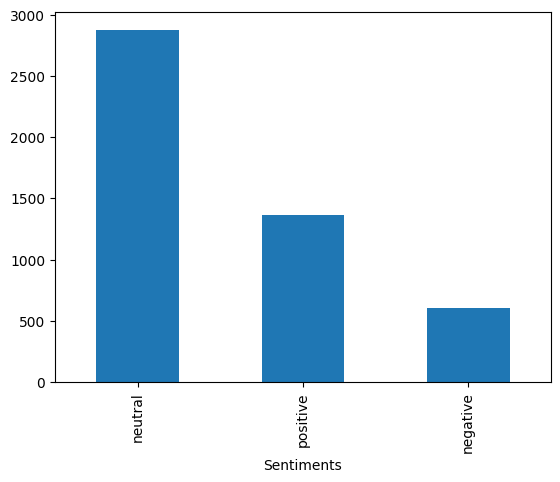

In [10]:
df['Sentiments'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

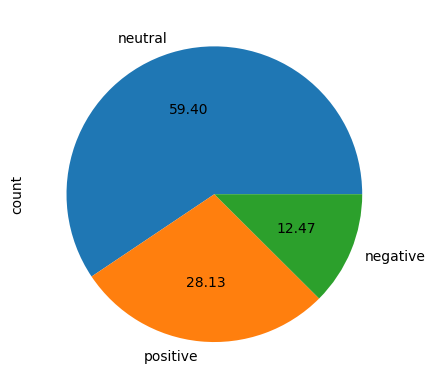

In [11]:
df['Sentiments'].value_counts().plot(kind='pie', autopct = '%.2f')

In [12]:
import seaborn as sns

# Preprocessing

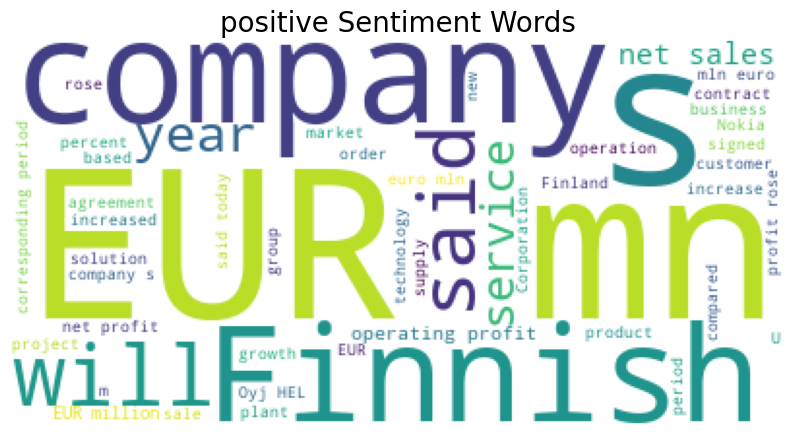

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcount_gen(df, Sentiments):
    # Combine all headlines for the specified sentiment
    combined_headlines = " ".join([headline for headline in df[df.Sentiments == Sentiments]['Headlines']])
    
    # Initialize WordCloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords=STOPWORDS)

    # Generate and plot WordCloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wc.generate(combined_headlines))
    plt.title('{} Sentiment Words'.format(Sentiments), fontsize=20)  # Fix: Use Sentiments instead of category
    plt.axis('off')
    plt.show()

# Example usage
# Positive tweet words
wordcount_gen(df, 'positive')


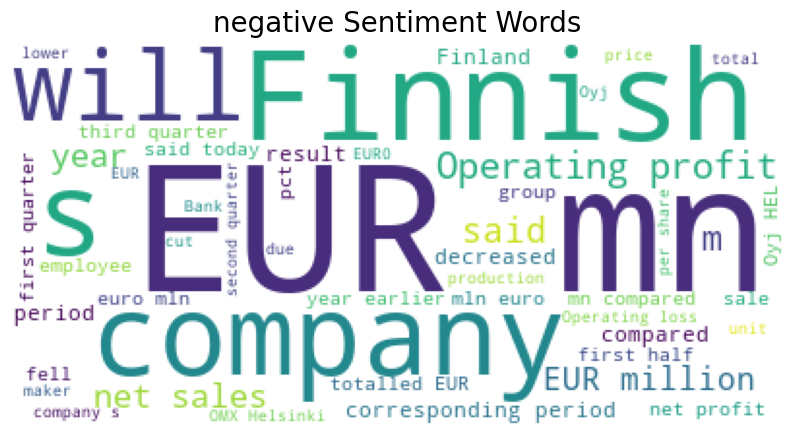

In [14]:
wordcount_gen(df, 'negative') 

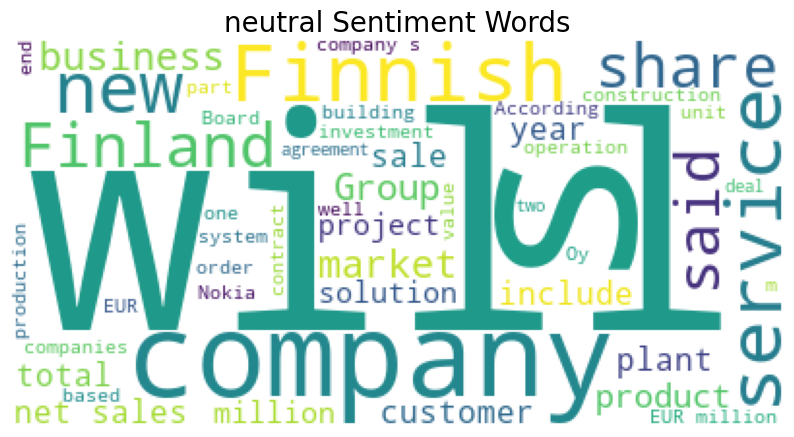

In [15]:
wordcount_gen(df, 'neutral')

In [16]:
df["Headlines"]=df["Headlines"].str.lower()
df["Headlines"]=df["Headlines"].str.replace("[^\w\s]","")
df["Headlines"]=df["Headlines"].str.replace("\d+","")
df["Headlines"]=df["Headlines"].str.replace("\n","")
df_neutral = df[df['Sentiments']=='neutral']
df_positive= df[df['Sentiments']=='positive']
df_negative=df[df['Sentiments']=='negative']
df["Sentiments"]=df["Sentiments"].map({"positive":1,"neutral":0,"negative":-1})
df["Sentiments"]= df["Sentiments"].astype(int)
df1 = df[df['Sentiments']!=0]


In [17]:
df1.head()

,Sentiments,Headlines
1,-1,the international electronic industry company ...
2,1,with the new production plant the company woul...
3,1,according to the company 's updated strategy f...
4,1,financing of aspocomp 's growth aspocomp is ag...
5,1,"for the last quarter of 2010 , componenta 's n..."


In [18]:
df.head()

,Sentiments,Headlines
0,0,technopolis plans to develop in stages an area...
1,-1,the international electronic industry company ...
2,1,with the new production plant the company woul...
3,1,according to the company 's updated strategy f...
4,1,financing of aspocomp 's growth aspocomp is ag...


In [57]:
type(df['Headlines'])

pandas.core.series.Series

In [19]:
import nltk  #natural language processing
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.porter import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
def text_to_words(text):
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    
    # return list
    return words

print("\nOriginal tweet ->", df['Headlines'][1])
print("\nProcessed tweet ->", text_to_words(df['Headlines'][4000]))


Original tweet -> the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily postimees reported .

Processed tweet -> ['fair', 'valu', 'invest', 'properti', 'eur', '2', '251.0', '(', '1', '281.4', ')', 'million', '.']


In [21]:
df3 = df.copy()
df3.head()

,Sentiments,Headlines
0,0,technopolis plans to develop in stages an area...
1,-1,the international electronic industry company ...
2,1,with the new production plant the company woul...
3,1,according to the company 's updated strategy f...
4,1,financing of aspocomp 's growth aspocomp is ag...


In [22]:
type(df3['Headlines'].str)

pandas.core.strings.accessor.StringMethods

In [23]:
# df3 
# i = int(0)
# while i < len(df3['Headlines']):
#     print(df3.iloc[i])
#     i++

In [24]:
def text_to_words(text):
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    
    # return list
    return words
for i in range(len(df3['Headlines'])):
    print(text_to_words(df3['Headlines'][i]))

['technopoli', 'plan', 'develop', 'stage', 'area', 'less', '100,000', 'squar', 'meter', 'order', 'host', 'compani', 'work', 'comput', 'technolog', 'telecommun', ',', 'statement', 'said', '.']
['intern', 'electron', 'industri', 'compani', 'elcoteq', 'laid', 'ten', 'employe', 'tallinn', 'facil', ';', 'contrari', 'earlier', 'layoff', 'compani', 'contract', 'rank', 'offic', 'worker', ',', 'daili', 'postime', 'report', '.']
['new', 'product', 'plant', 'compani', 'would', 'increas', 'capac', 'meet', 'expect', 'increas', 'demand', 'would', 'improv', 'use', 'raw', 'materi', 'therefor', 'increas', 'product', 'profit', '.']
['accord', 'compani', "'s", 'updat', 'strategi', 'year', '2009-2012', ',', 'baswar', 'target', 'long-term', 'net', 'sale', 'growth', 'rang', '20', '%', '-40', '%', 'oper', 'profit', 'margin', '10', '%', '-20', '%', 'net', 'sale', '.']
['financ', 'aspocomp', "'s", 'growth', 'aspocomp', 'aggress', 'pursu', 'growth', 'strategi', 'increasingli', 'focus', 'technolog', 'demand', 'h

['sale', 'risen', 'export', 'market', '.']
['sale', 'increas', 'due', 'grow', 'market', 'rate', 'increas', 'oper', '.']
['agreement', 'strengthen', 'long-term', 'partnership', 'nokia', 'siemen', 'network', '.']
['agreement', 'sign', 'biohit', 'healthcar', 'ltd', ',', 'uk-bas', 'subsidiari', 'biohit', 'oyj', ',', 'finnish', 'public', 'compani', 'develop', ',', 'manufactur', 'market', 'liquid', 'handl', 'product', 'diagnost', 'test', 'system', '.']
['compani', 'also', 'estim', 'alreadi', 'carri', 'invest', 'lead', 'increas', 'net', 'sale', '2010', '2009', 'reach', 'eur', '141.7', 'million', '.']
['compani', "'s", 'order', 'book', 'stood', '1.5', 'bln', 'euro', '$', '2.2', 'bln', 'septemb', '30', ',', '2007', ',', '24.2', 'pct', 'year', ',', 'intern', 'order', 'amount', '365', 'mln', 'euro', '$', '534.3', 'mln', '.']
['compani', 'said', 'paper', 'demand', 'increas', 'main', 'market', ',', 'includ', 'public', 'paper', ',', 'increas', 'averag', 'paper', 'price', '4', 'percent', 'compar', 'l

['acquisit', 'consider', 'increas', 'kemira', "'s", 'sale', 'market', 'posit', 'russian', 'metal', 'industri', 'coat', 'market', '.']
['january-septemb', '2007', ',', 'finnlin', "'", 'net', 'sale', 'rose', 'eur', '505.4', 'mn', 'eur', '473.5', 'mn', 'correspond', 'period', '2006', '.']
['adjust', 'chang', 'group', 'structur', ',', 'divis', "'s", 'net', 'sale', 'increas', '1.7', '%', '.']
['``', 'chang', 'optim', 'oper', 'effici', 'grow', 'busi', ',', "''", 'said', 'julia', 'prohaska', ',', 'director', 'market', 'commun', 'fiskar', '.']
['``', 'would', 'invest', 'physic', 'infrastructur', ',', 'would', 'also', 'provid', 'know-how', 'manag', 'develop', 'scienc', 'technolog', 'park', ',', "''", 'said', 'sunris', 'valley', 'director', 'andriu', 'bagdona', '.']
['4', 'februari', '2011', '-', 'finnish', 'broadband', 'data', 'commun', 'system', 'provid', 'telest', 'oyj', 'hel', ':', 'tlt1v', 'saw', 'net', 'profit', 'jump', 'eur2', '.1', 'last', 'quarter', '2010', 'eur995', ',000', 'period', '

['takeov', ',', 'cramo', 'becom', 'second', 'largest', 'rental', 'servic', 'provid', 'latvian', 'market', '.']
[',', 'signific', 'sale', 'increas', '18.6', '%', 'russia', '.']
['alma', 'media', 'expect', 'net', 'sale', 'increas', 'forecast', 'previous', '.']
['also', 'lemmink+æinen', "'s", 'profit', 'account', 'period', 'went', 'eur', '3.1', 'mn', 'eur', '-24.5', 'mn', 'year', 'ago', '.']
['end', 'march', '2007', ',', 'group', "'s", 'order', 'book', 'eur', '39.6', 'mn', ',', '42', '%', 'correspond', 'period', '2006', '.']
['time', 'profit', 'compani', 'increas', '10', '%', 'h1', 'reach', 'ls', '79,000', '.']
['aviat', 'system', 'mainten', 'base', 'kansa', 'gener', 'net', 'sale', 'usd', '2.6', 'million', '2008', '.']
['besid', 'increas', 'share', 'meat', 'variou', 'sausag', 'offer', 'number', 'new', 'tast', 'grill', 'product', 'shish', 'kebab', 'segment', ',', "''", 'paavel', 'said', '.']
['oper', 'profit', 'net', 'sale', '12-month', 'period', 'increas', ',', 'respect', 'eur10', '.5', '

['howev', ',', 'sale', 'return', 'growth', 'april-jun', '2010', ',', 'ceo', 'pekka', 'eloholma', 'said', '.']
['raguti', ',', 'control', 'finnish', 'breweri', ',', 'report', '5.4-per-cent', 'rise', 'beer', 'sale', '10.44', 'million', 'litr', 'held', '11.09-per-cent', 'market', 'share', '.']
['svyturys-uteno', 'alu', ',', 'control', 'nordic', 'group', 'baltic', 'beverag', 'hold', '(', 'bbh', ')', ',', 'post', '4.7-per-cent', 'growth', 'beer', 'sale', 'january-may', '46.22', 'million', 'litr', '.']
['2007', ',', 'contempu', 'gener', 'revenu', 'nok', '69.3', '(', 'approx', '.']
['addit', ',', 'kone', 'sign', 'two-year', 'mainten', 'contract', 'escal', '.']
['decemb', 'alon', ',', 'member', 'lithuanian', 'brewer', "'", 'associ', 'sold', 'total', '20.3', 'million', 'liter', 'beer', ',', 'increas', '1.9', 'percent', 'sale', '19.92', 'million', 'liter', 'decemb', '2004', '.']
['january-septemb', '2009', ',', 'group', "'s", 'net', 'interest', 'incom', 'increas', 'eur', '112.4', 'mn', 'eur', '7

['profit', 'period', 'eur', '5.9', 'mn', ',', 'eur', '1.3', 'mn', '.']
['profit', 'period', 'eur', '9.8', 'mn', ',', 'eur', '6.0', 'mn', '2004', '.']
['revenu', 'grew', '12', 'percent', '(', 'x20ac', ')', '3.6', 'billion', '(', 'us$', '4.5', 'billion', ')', '.']
['revenu', 'juli', 'septemb', 'grew', '14', 'percent', '(', 'euro', ')', '467', 'million', 'year', 'earlier', ',', 'compani', 'said', 'thursday', '.']
['revenu', 'time', 'grew', '14', 'percent', '43', 'million', 'euro', '.']
['ruukki', 'sign', 'contract', 'deliv', 'instal', 'steel', 'structur', 'bridg', 'kyronsalmi', 'strait', 'savonlinna', ',', 'finland', '.']
['sale', 'latin', 'america', 'increas', '42', '%', 'eur', '432mn', ',', 'total', '8.7', 'mn', 'mobil', 'devic', 'sold', 'area', ',', 'repres', 'increas', '32', '%', 'correspond', 'period', '2009', '.']
['sale', 'cloth', 'develop', 'best', '.']
['sanoma', 'magazin', 'finland', "'s", 'net', 'sale', 'grew', 'eur', '140.1', 'mn', 'eur', '131.8', 'mn', '.']
['satama', "'s", '

['report', 'period', ',', 'net', 'sale', 'rose', '8', '%', 'year-on-year', 'eur64', '.3', ',', 'due', 'busi', 'acquisit', 'realiz', 'first', 'half', '2008-09', ',', 'effect', 'eur10', '.9', 'review', 'period', '.']
['report', 'period', ',', 'compani', "'s", 'oper', 'profit', 'grew', '43.2', '%', 'eur', '6', 'million', '.']
['last', 'year', "'s", 'net', 'sale', 'rose', 'eur', '68.3', 'million', 'eur', '62.2', 'million', '.']
['last', 'year', 'compani', 'rais', 'turnov', 'approxim', '7', 'million', 'lita', 'eur', '2', 'mln', ',', '6.1', 'million', 'lita', '2004', '.']
['adp', 'news', '-', 'nov', '18', ',', '2008', '-', 'finnish', 'ac', 'drive', 'manufactur', 'vacon', 'oyj', 'omx', ':', 'vac1v', 'said', 'today', 'set', 'new', 'repres', 'offic', 'romania', 'ukrain', 'serv', 'grow', 'market', 'eastern', 'southeastern', 'europ', '.']
['marimekko', 'group', "'s", 'full-year', 'net', 'sale', 'estim', 'increas', '10', '%', '.']
['net', 'sale', 'surg', '30', '%', 'eur', '36', 'million', '.']
['n

['separ', ',', 'yit', 'corpor', 'austrian', 'firm', 'e', 'ag', 'last', 'week', 'sign', 'agreement', 'sale', 'e', "'s", 'build', 'system', 'servic', 'busi', 'germani', ',', 'austria', ',', 'poland', ',', 'czech', 'republ', ',', 'hungari', 'romania', 'eur', '55', 'mln', '.']
['agreement', 'jm', 'one', 'seri', 'contract', 'teliasonera', 'sign', 'recent', 'month', 'residenti', 'construct', 'real', 'estat', 'manag', 'compani', 'sweden', '.']
['compani', 'intend', 'rais', 'product', 'capac', '2006', '.']
['estim', 'valu', 'contract', 'eur12', '.4', 'm.', 'vaisala', ',', 'headquart', 'helsinki', 'finland', ',', 'develop', 'manufactur', 'electron', 'measur', 'system', 'meteorolog', ',', 'environment', 'scienc', ',', 'traffic', 'industri', '.']
['mall', 'part', 'baltic', 'pearl', 'develop', 'project', 'citi', 'st', 'petersburg', ',', 'baltic', 'pearl', 'cjsc', ',', 'subsidiari', 'shanghai', 'foreign', 'joint', 'invest', 'compani', ',', 'develop', 'home', '35,000', 'peopl', '.']
['new', 'facil',

['vaisala', 'oyj', 'press', 'releas', 'septemb', '30', ',', '2010', 'vaisala', 'sign', 'contract', 'sell', 'oxygen', 'measur', 'technolog', 'busi', 'sick', 'maihak', 'gmbh', '.']
['-', 'beij', 'xfn-asia', '-', 'hong', 'kong-list', 'standard', 'charter', 'bank', 'said', 'sign', 'china', 'mobil', 'phone', 'dealer', 'financ', 'agreement', 'nokia', ',', 'make', 'first', 'foreign', 'bank', 'offer', 'financ', 'countri', "'s", 'small', 'medium', 'enterpris', '-lr']
['-', 'provid', 'summari', 'medic', 'equip', 'pipelin', 'product', 'compani', 'develop', '.']
['``', 'cours', ',', 'talk', 'come', 'new', 'project', 'involv', 'materi', 'handl', ',', "''", 'konecran', 'presid', 'ceo', 'pekka', 'lundmark', 'said', ',', 'ask', 'whether', 'talk', 'relianc', 'industri', 'suppli', 'equip', 'upcom', 'refineri', 'jamnagar', '.']
['``', 'lidsko', 'pivo', "'s", 'invest', 'program', 'forese', 'integr', 'modern', 'product', ',', 'updat', 'transport', 'logist', 'infrastructur', 'develop', 'new', 'market', 'ins

['expans', 'includ', 'doubl', 'floor', 'space', 'addit', 'lift', 'capac', 'product', 'equip', '.']
['group', 'aim', 'increas', 'net', 'sale', 'compar', 'oper', 'profit', '2006', '.']
['order', 'also', 'includ', 'start-up', 'commiss', 'servic', '.']
['order', 'consist', 'capac', 'expans', ',', 'mainten', 'servic', 'new', 'charg', 'function', ',', 'compani', 'said', '.']
['phone', 'target', 'first', 'time', 'user', 'growth', 'market', '.']
['repay', 'eur', '105', 'million', 'debentur', 'bond', 'relat', 'compani', "'s", 'previou', 'announc', 'octob', '21', ',', '2009', 'collect', 'irrevoc', 'sell', 'commit', 'holder', 'subordin', 'debentur', 'bond', '.']
['revenu', 'busi', 'reach', 'nok', '12', 'million', '2008', '.']
['subscript', 'increas', 'cargotec', "'s", 'share', 'capit', '36,780', 'euro', '.']
['subscript', 'increas', 'cargotec', "'s", 'share', 'capit', 'eur', '27,060', '.']
['total', 'area', 'gorelovo', 'plant', '22,000', 'sq', 'm.', 'atria', 'invest', 'euro', '70mn', 'plant', ','

['helsinki', 'octob', '22', ',', '2008', 'ssh', 'commun', 'secur', 'corp', 'board', 'director', 'inform', ',', 'pleas', 'contact', ':', 'tomi', 'laamanen', ',', 'chairman', ',', 'tel.', '+358', '0', '400', '609', '544', 'distribut', ':', 'nasdaq', 'omx', 'helsinki', 'ltd.', '.']
['patrizia', 'add', 'acquisit', 'portfolio', 'alreadi', 'worth', 'eur3bn', '.']
['sale', 'rose', '300.9', 'mln', 'eur', 'compar', 'last', 'year', "'s", '276.1', 'mln', 'eur', 'line', '299', 'mln', 'eur', 'consensu', 'figur', '.']
['contract', 'sign', 'august', 'papua', 'new', 'guinea-bas', 'lihir', 'gold', 'ltd', 'asx', ':', 'lgl', '.']
['offer', '30', 'million', 'share', 'aim', 'rais', 'x20ac', '500', 'million', 'us$', '640', 'million', ',', 'expect', 'complet', 'oct.', '9', ',', 'outokumpu', 'said', '.']
['``', 'extens', 'co-oper', 'also', 'bolster', 'sysopen', 'digia', "'s", 'posit', 'domest', 'oper', 'market', ',', "''", 'kallioranta', 'add', '.']
['``', 'agreement', ',', 'continu', 'good', 'cooperationand'

['vaisala', 'group', 'success', 'intern', 'technolog', 'compani', 'develop', ',', 'manufactur', 'market', 'electron', 'measur', 'system', 'product', '.']
['vuokatti', 'unit', 'develop', 'focu', 'especi', 'manufactur', 'prototyp', ',', 'ramp-up', 'new', 'product', 'demand', 'test', 'after-sal', 'servic', '.']
['look', 'forward', 'help', 'compani', 'develop', 'oper', 'servic', 'digit', 'servic', 'custom', '.', "''"]
['agj', 'record', 'eur', '43', 'mln', 'sale', '2006', ',', 'gener', 'export', 'custom', 'western', 'europ', ',', 'statement', 'said', '.']
['``', 'number', 'collect', 'error', 'fell', 'consider', ',', 'oper', 'speed', '.']
['combin', 'exist', 'solut', 'singl', 'platform', ',', 'comptel', 'said', 'reduc', 'cost', 'deploy', '.']
['second', 'quarter', '2010', ',', 'group', "'s", 'pretax', 'loss', 'narrow', 'eur', '400,000', 'eur', '600,000', '.']
['26', 'januari', '2011', '-', 'finnish', 'metal', 'product', 'compani', 'componenta', 'oyj', '(', 'hel', ':', 'cth1v', ')', 'said', '

['profit', 'tax', 'amount', 'eur', '56.5', 'mn', ',', 'eur', '232.9', 'mn', 'year', 'ago', '.']
['profit', 'tax', 'decreas', '9', '%', 'eur', '187.8', 'mn', 'first', 'nine', 'month', '2008', ',', 'compar', 'eur', '207.1', 'mn', 'year', 'earlier', '.']
['profit', 'tax', 'decreas', 'eur', '31.6', 'mn', 'eur', '50.0', 'mn', 'year', '.']
['profit', 'tax', 'eur', '4.0', 'mn', ',', 'eur', '4.9', 'mn', '.']
['compani', "'s", 'profit', 'tax', 'fell', 'eur', '21.1', 'mn', 'third', 'quarter', '2008', ',', 'compar', 'eur', '35.8', 'mn', 'correspond', 'period', '2007', '.']
['state', 'program', 'work', ',', 'legal', 'provis', 'develop', ',', 'rule', 'norm', 'document', 'specifi', 'function', 'technolog', 'park', '.']
['august-octob', '2010', ',', 'compani', "'s", 'result', 'tax', 'total', 'eur', '9.6', 'mn', ',', 'eur', '0.5', 'mn', 'correspond', 'period', '2009', '.']
['finnish', 'bore', 'own', 'rettig', 'famili', 'grown', 'recent', 'acquisit', 'smaller', 'ship', 'compani', '.']
['plan', 'estim',

['cencorp', 'estim', 'net', 'sale', 'last', 'quarter', 'earlier', 'state', ',', 'eur4', '.3', 'eur5', '.0', ',', 'oper', 'profit', '(ebit)i', 'estim', 'posit', '.']
['``', 'custom', 'satisfi', 'baswar', 'invoic', 'autom', 'solut', 'extend', 'implement', 'new', 'geographi', '.']
['repeat', 'see', '2008', 'ebita', '18', 'pct', 'sale', '.']
['`', 'separ', 'side', 'busi', 'abl', 'faster', 'expand', 'develop', 'tapro', 'retail', 'network', '.']
['`', 'strateg', 'cooper', 'rentakran', 'bring', 'us', 'new', 'custom', 'already-work', 'relationship', 'author', 'new', 'territori', ',', "'", 'said', 'jarmo', 'laasanen', ',', 'senior', 'manag', 'cramo', '.']
['`', 'patja', 'work', 'well', 'us', 'decad', ',', 'fujitsu', "'s", 'new', 'bid', 'competit', '.']
['``', 'share', 'purchas', 'complet', ',', 'financ', 'also', 'provid', 'expand', 'latvia', "'s", 'broadband', 'infrastructur', 'develop', 'new', 'area', 'busi', ',', 'includ', 'acquisit', 'compani', '.', "''"]
['``', 'term', 'profit', 'earn', '20

['27', 'januari', '2011', '-', 'finnish', 'solut', 'provid', 'affecto', 'oyj', '(', 'hel', ':', 'afe1v', ')', 'said', 'today', 'eur1', '.2', '(', 'usd1', '.6', ')', 'contract', 'state-own', 'lithuanian', 'social', 'insur', 'institut', '(', 'sodra', ')', '.']
['accord', 'finnish', 'pension', 'insur', 'compani', 'varma', ',', 'varma', 'recipi', 'two', 'third', 'revenu', 'earnings-rel', 'pension', 'cover', 'competit', 'tender', 'finland', '.']
['finnish', 'construct', 'group', 'lemmink+æinen', 'award', 'two', 'road', 'build', 'contract', 'lithuanian', 'transport', 'administr', '.']
['finnish', 'construct', 'group', 'yit', 'award', 'contract', 'instal', 'heat', ',', 'air', 'condit', 'cool', 'system', 'new', 'head', 'offic', 'automobil', 'associ', 'adac', 'munich', 'germani', '.']
['finnish', 'flexibl', 'packag', 'manufactur', 'suominen', 'corpor', 'report', 'net', 'sale', 'eur', '54.5', 'mn', 'first', 'quarter', '2008', ',', 'compar', 'eur', '54.3', 'mn', 'year', 'earlier', '.']
['finnish'

['(', 'adp', 'news', ')', '-', 'oct', '31', ',', '2008', '-', 'finnish', 'food', 'compani', 'raisio', 'oyj', '(', 'omx', ':', 'raivv', ')', 'said', 'today', 'net', 'profit', 'jump', 'eur', '16.4', 'million', '(', 'usd', '20.9', ')', 'first', 'nine', 'month', '2008', 'eur', '1.1', 'million', 'period', '2']
['(', 'adp', 'news', ')', '-', 'sep', '30', ',', '2008', '-', 'finnish', 'secur', 'privaci', 'softwar', 'solut', 'develop', 'stonesoft', 'oyj', 'said', 'today', 'usd', '1.9', 'million', '(', 'eur', '1.3', ')', 'order', 'deliv', 'stoneg', 'network', 'secur', 'product', 'unnam', 'russian', 'te']
['meanwhil', ',', 'electrowatt-ekono', 'philippin', ',', 'inc.', 'also', 'award', 'three-year', 'oper', 'mainten', '(', 'o&m', ')', 'contract', 'fr', 'cement', 'corpor', '.']
['meanwhil', ',', 'nokia', 'said', 'abl', 'deliv', 'complet', 'rang', 'servic', 'deploy', 'oper', 'consult', 'integr', 'manag', 'servic', 'result', 'buyout', '.']
['metso', 'paper', "'s", 'deliveri', 'compris', 'advantag', 

['``', 'last', 'year', ',', 'finnair', 'record', '32.6-percent', 'growth', 'asian', 'sector', ',', 'carri', '1.10', 'million', 'passeng', 'two', 'contin', '.', "''"]
['``', 'addit', 'flight', 'link', 'mumbai', 'helsinki', 'dictat', 'strong', 'traffic', 'demand', 'asia', 'europ', '.']
['``', 'lower', 'price', 'us', 'competitor', 'show', 'real', 'estat', 'market', 'stabilis', 'return', 'balanc', 'apart', 'acquir', 'fair', 'price', 'eye', 'client', '.']
['``', 'new', 'structur', 'provid', 'better', 'commun', ',', 'faster', 'decision-mak', 'cost', 'save', ',', "''", 'proha', 'said', '.']
['``', 'contract', 'demonstr', 'abil', 'appli', 'miner', 'metal', 'technolog', 'adjac', 'industri', ',', 'oil', 'shale', 'process', '.']
['``', 'pleas', 'deliv', 'baswar', 'invoic', 'autom', 'solut', 'major', 'retail', 'compani', 'us', '.']
['``', 'tailor', 'solut', 'meet', 'solel', "'s", 'technic', 'requir', ',', 'result', 'cost-effect', 'manufactur', 'highest-qu', 'reflector', '.', "''"]
['``', "'ve", 'f

['world', "'s", 'biggest', 'magazin', 'paper', 'maker', 'said', 'program', 'improv', 'effici', 'includ', 'close', 'sever', 'least', 'competit', 'mill', 'would', 'cover', 'compani', "'s", 'oper', 'result', 'annual', 'save', 'euro200', 'million', 'us$', '240', 'million', '.']
['moder', 'signific', 'chang', 'result', 'signific', '24-32', '%', 'reduct', 'estim', 'cvd', 'risk', '.']
['uponor', 'improv', 'perform', 'spite', 'decreas', 'residenti', 'construct', 'us', '.']
['inventor', 'issu', 'u.s.', 'patent', 'no.', '.']
['isra', 'cabl', 'network', 'oper', 'hot', 'telecom', 'chosen', 'telest', ',', 'intern', 'technolog', 'group', ',', 'exclus', 'provid', 'fttx', 'equip', 'israel', ',', 'accord', 'telest', 'today', '.']
['incap', 'corpor', 'stock', 'exchang', 'releas', '4', 'may', '2010', '8.30', 'a.m.', 'incap', 'corpor', "'s", 'direct', 'share', 'issu', 'subscrib', 'full', 'board', 'incap', 'corpor', 'approv', 'subscript', 'direct', 'share', 'issu', '.']
['amer', 'sport', 'divest', 'industr

['mr.', 'mikko', 'saavalainen', ',', 'head', 'comptel', "'s", 'global', 'sale', 'conclud', ':', '``', 'gibtelecom', 'provid', 'perfect', 'illustr', 'varieti', 'busi', ',', 'technic', 'regulatori', 'challeng', 'oper', 'face', 'oss', 'today', '.']
['nest', 'oil', 'said', 'result', 'biomass', '3', 'liquid', 'demonstr', 'plant', ',', 'commiss', 'june', '2009', ',', 'promis', ',', 'decis', 'commerci', 'plant', 'taken', '.']
['nokia', 'continu', 'invest', 'futur', 'develop', 'qt', ',', 'digia', 'respons', 'commerci', 'licens', 'servic', 'busi', '.']
['nonwoven', 'specialti', 'paper', ',', 'made', 'ahlstrom', ',', 'use', 'larg', 'varieti', 'everyday', 'product', ',', 'e.g.', 'filter', ',', 'wipe', ',', 'floor', ',', 'label', ',', 'tape', '.']
[',', 'nokia', 'announc', 'launch', 'bicycl', 'charger', 'kit', 'compat', 'nokia', 'phone', '2', 'mm', 'charg', 'interfac', '.']
['basi', 'competit', 'bid', 'ooo', 'kitai', 'stroi', ',', 'russian', 'subsidiari', 'china', 'state', 'construct', 'engin', 'c

['``', 'hope', 'clarifi', 'polici', 'finnish', 'busi', 'gray', 'area', ',', "''", 'motlanth', 'said', '.']
['``', ',', 'relev', 'author', 'approv', ',', 'make', 'mandatori', 'bid', 'requir', 'finnish', 'secur', 'market', 'act', '.']
['1', 'novemb', '2010', '-', 'finnish', 'textil', 'cloth', 'compani', 'marimekko', 'oyj', '(', 'hel', ':', 'mmo1v', ')', 'announc', 'friday', 'open', 'first', 'concept', 'store', 'seoul', 'cooper', 'japanes', 'sector', 'player', 'look', 'inc', '(', 'tyo', ':', '8029', ')', '.']
['broad', 'rang', 'connect', 'option', 'includ', '3g', '-', 'hspa', 'wi-fi', 'give', 'consum', 'high', 'speed', 'access', 'internet', '.']
['new', 'product', 'line', 'complet', 'contract', 'product', 'hormon', 'treatment', '.']
['quick', '``', 'one-stop-shop', "''", 'understand', 'compani', '.']
['dopplr', 'dopplr', 'servic', 'smart', 'travel', '.']
['elcoteq', 'elcoteq', 'se', 'lead', 'electron', 'manufactur', 'servic', '(', 'em', ')', 'compani', 'commun', 'technolog', 'field', '.']

['donat', 'univers', 'annual', 'gener', 'meet', 'author', 'board', 'director', 'donat', 'max', '.']
['dopplr', 'member', 'share', 'person', 'busi', 'travel', 'plan', 'privat', 'network', ',', 'highlight', 'interest', 'place', 'stay', ',', 'eat', 'explor', 'citi', 'around', 'world', '.']
['dragonfli', 'love', 'anoth', 'video', 'shot', 'start', 'finish', 'use', 'nokia', 'n8', '.']
['past', '10', 'year', 'factori', 'produc', 'mani', 'nokia', "'s", 'popular', 'model', 'includ', 'nokia', '2760', ',', 'nokia', '6300', 'well', 'nokia', "'s", 'latest', 'music', 'devic', 'nokia', '5800', 'express', 'music', '.']
['eb', 'hold', 'exclus', 'right', 'market', 'new', 'entiti', "'s", 'product', '.']
['elcoteq', "'s", 'electron', 'manufactur', 'servic', '(', 'em', ')', 'busi', 'segment', 'serv', 'custom', 'global', 'engin', ',', 'manufactur', 'fulfil', 'servic', '.']
['elisa', 'corpor', ',', 'headquart', 'helsinki', ',', 'finnish', 'telecomm', 'compani', 'offer', 'privat', 'corpor', 'custom', 'compreh

['kone', ',', 'headquart', 'espoo', ',', 'finland', ',', 'one', 'world', "'s", 'lead', 'elev', 'escal', 'compani', '.']
['last', 'juli', ',', 'group', 'said', 'intend', 'reloc', 'warehous', 'offic', 'space', 'loudeac', 'saint', 'marcel', 'morvillar', ',', 'east', 'franc', ',', 'alreadi', 'oper', 'hook', 'manufactur', 'distribut', 'unit', '.']
['lember', 'said', 'matter', 'topic', 'also', 'estonia', ',', 'bill', 'draft', 'social', 'affair', 'ministri', 'would', 'scrap', 'old-ag', 'pension', 'favor', 'condit', '.']
['lind', 'act', 'respons', 'toward', 'sharehold', ',', 'busi', 'partner', ',', 'employe', ',', 'societi', 'environ', '-', 'everi', 'one', 'busi', 'area', ',', 'region', 'locat', 'across', 'globe', '.']
['lkab', ',', 'headquart', 'lulea', ',', 'sweden', ',', 'high-tech', 'mine', 'compani', 'produc', 'upgrad', 'iron', 'ore', 'product', 'steel', 'industri', '.']
['llc', ',', 'voic', 'data', 'manag', 'solut', 'provid', 'wireless', 'compani', 'oper', 'worldwid', ',', 'transfer', 'u

['technopoli', "'s", 'technolog', 'center', 'suppli', 'client', 'modern', 'high-class', 'premis', '.']
['tekla', 'provid', '3d', 'softwar', 'build', 'infrastructur', 'engin', ',', 'focu', 'build', 'inform', 'model', 'steel', 'concret', 'structur', 'design', 'construct', '.']
['telest', "'s", 'hybrid', 'tv', 'solut', 'includ', 'compon', 'whole', 'process', 'deliv', 'video', 'servic', 'consum', 'content', 'acquisit', 'servic', 'creation', 'deliveri', 'rang', 'access', 'solut', ',', 'includ', 'hfc', '(', 'hybrid', 'fibre-coaxi', ')', ',', 'xdsl', ',', 'etth', ',', 'ftth', '.']
['adjust', 'measur', 'carri', 'phase', 'secur', 'deliveri', 'capabl', '.']
['agreement', 'valid', 'four', 'year', '.']
['allianc', 'aim', 'tap', 'pocket', 'mobil', 'comput', ',', 'netbook', ',', 'tablet', ',', 'mediaphon', ',', 'connect', 'tv', 'in-vehicl', 'infotain', 'system', '.']
['avail', 'internet', 'servic', 'highlight', 'servic', 'offer', 'kesko', "'s", 'k-group', 'store', '.']
['broker', 'start', 'upm-kymme

['sale', 'allow', 'campofrio', 'focu', 'recent', 'announc', 'takeov', 'group', 'smithfield', 'hold', ',', 'european', 'unit', 'smithfield', 'food', 'inc.', '(', 'sfd', ')', 'u.s.']
['scope', 'project', 'find', 'cost-effici', 'method', 'phosphor', 'remov', 'deliv', 'store', 'dose', 'equip', ',', 'use', 'continu', 'oper', 'plant', '.']
['server', 'respons', 'manag', 'devic', 'user', 'account', 'desktop', 'client', 'applic', 'enabl', 'remot', 'access', 'mobil', 'phone', '.']
['servic', 'develop', 'digia', 'facilit', 'work', 'resourc', 'health', 'care', 'personnel', 'vaccin', 'campaign', 'provid', 'monitor', 'manag', 'tool', '.']
['share', 'share', 'capit', 'mention', 'sharehold', 'remain', '5', '%', '.']
['share', 'carri', 'right', 'dividend', 'sharehold', 'right', 'registr', 'finnish', 'trade', 'regist', '.']
['share', 'shall', 'repurchas', 'public', 'trade', ',', 'reason', 'share', 'repurchas', 'otherwis', 'proport', 'hold', 'sharehold', '.']
['shipyard', 'hope', 'region', 'govern', 'an

['cut', 'bring', 'outdoor', 'birch-branch', 'coaster', '.']
['download', 'instruct', 'sheet', ',', 'instruct', 'video', ',', 'project', 'idea', 'award-win', 'everywher', 'punch', 'tm', 'window', 'system', 'found', 'www.fiskars.com', '.']
['new', 'kveyt', 'light', 'varieti', 'suomalainen', 'pekoni', 'market', 'atria', 'brand', 'name', 'avail', 'consum', 'finland', '.']
['plumb', 'busi', 'announc', 'sponsor', 'profession', 'dart', 'player', '.']
['realign', 'interest', 'sector', 'clearli', 'way', '.']
['a.', 'le', 'coq', 'special', 'develop', 'bicentenari', 'compani', 'trade', 'mark', ',', 'brewer', 'said', '.']
['estim', 'indic', 'even', '170', 'differ', 'tablet', 'comput', 'read', 'devic', 'avail', '2011', '.']
['finnish', 'construct', 'compani', 'yit', 'corpor', 'plan', 'build', '200', 'high-qual', 'holiday', 'home', 'near', 'tahko', 'ski', 'spa', 'resort', ',', 'finland', '.']
['pilot', ',', 'instrument', 'develop', 'accord', 'experi', 'gain', '.']
['lift', 'veil', 'variou', 'type', 

['make', 'wide', 'rang', 'mobil', 'devic', 'servic', 'softwar', 'enabl', 'peopl', 'experi', 'music', ',', 'navig', ',', 'video', ',', 'televis', ',', 'imag', ',', 'game', 'busi', 'mobil', '.']
['offer', 'advanc', 'machineri', 'mainten', 'process', 'develop', 'servic', 'pulp', 'paper', 'industri', 'northern', 'china', '.']
['oper', 'three', 'distinct', 'brand', ':', 'unit', 'supermarket', ',', 'market', 'street', 'unit', 'supermercado', '.']
['area', 'highli', 'valu', ',', 'land', 'alreadi', 'built', '.']
['kaido', 'kaar', ',', 'gener', 'director', 'atria', 'eesti', ',', 'say', 'compani', "'s", 'invest', 'upgrad', 'pig', 'farm', 'surpass', 'eek', '150mn', 'eur', '9.59', 'mn', 'usd', '14.19', 'mn', 'past', 'year', '.']
['kaukopartio', 'oy', 'acquir', 'special', 'knowledg', 'far', 'eastern', 'oper', ',', 'industri', 'sourc', 'servic', 'core', 'compet', '.']
['kaupth', 'bank', 'publish', 'annual', 'result', '2007', 'market', 'open', 'thursday', '31', 'januari', '.']
['london', 'afx', '-', 

['compani', 'also', 'appoint', 'leif', 'rosen', 'head', 'special', 'plate', 'unit', 'includ', 'quarto', 'plate', 'unit', 'degerfor', ',', 'sweden', ',', 'new', 'castl', ',', 'usa', ',', 'unit', 'willich', ',', 'germani', ',', 'well', 'pressplat', 'prefab', 'avesta', 'plate', 'servic', 'centr', 'nordic', 'degerfor', '.']
['compani', 'design', ',', 'manufactur', 'market', 'advanc', 'composit', 'product', 'industri', 'applic', 'consum', 'good', 'cross-countri', ',', 'alpin', 'nordic', 'walk', 'pole', ',', 'floorbal', 'stick', 'antenna', 'radom', '.']
['compani', 'earlier', 'said', 'consid', 'differ', 'strateg', 'option', 'struggl', 'low-cost', 'mobil', 'oper', ',', 'includ', 'divest', 'hold', '.']
['compani', 'hope', 'new', 'plant', 'would', 'stream', 'end', '2008', '.']
['compani', 'own', 'state', 'finland', 'european', 'aeronaut', 'defens', 'space', 'compani', 'ead', 'n.v.', 'tekla', 'intern', 'softwar', 'compani', 'provid', 'solut', 'build', 'construct', ',', 'energi', 'distribut', 'mu

['today', ',', 'connect', 'peopl', 'new', 'differ', 'way', '-', 'fuse', 'advanc', 'mobil', 'technolog', 'person', 'servic', 'enabl', 'peopl', 'stay', 'close', 'matter', '.']
['togeth', 'gener', 'aspo', "'s", 'goodwil', '.']
['trade', 'new', 'share', ',', 'right', 'dividend', 'distribut', 'fund', ',', 'start', 'exchang', 'helsinki', 'tomorrow', '.']
['unc', 'charlott', 'would', 'also', 'deploy', 'ssh', 'tectia', 'connector', 'enabl', 'secur', 'applic', 'connect', '.']
['upm-kymmen', 'gener', 'four', 'consecut', 'quarter', 'posit', 'free', 'cash', 'flow', '.']
['upm-kymmen', 'gener', 'seventeen', 'consecut', 'quarter', 'posit', 'cash', 'flow', 'oper', '.']
['upm-kymmen', 'gener', 'thirty-on', 'consecut', 'quarter', 'posit', 'ebitda', '.']
['upm-kymmen', 'www.upm-kymmene.com', 'produc', 'magazin', 'paper', 'newsprint', ',', 'well', 'fine', 'specialti', 'paper', ',', 'convert', 'materi', 'wood', 'product', '.']
['wayn', 'greensmith', ',', 'fiskar', 'brand', 'uk', 'senior', 'brand', 'manag'

['``', 'pleas', 'proud', 'perform', 'last', 'year', ',', "''", 'chief', 'execut', 'juha', 'rantanen', 'said', 'statement', '.']
['``', "'m", 'pleas', 'receiv', 'nomin', 'committe', "'s", 'request', 'confid', ',', "''", 'say', 'jon', 'risfelt', '.']
['``', 'design', 'team', 'long', 'admir', 'marimekko', "'s", 'vivid', 'pattern', 'color', '.']
['``', 'overal', ',', "'re", 'pleas', 'startup', 'curv', '...', "'re", 'pleas', 'qualiti', 'paper', ',', "''", 'stora', 'spokeswoman', 'patricia', 'dietz', 'said', 'tuesday', '.']
['``', 'pleas', 'effort', 'negoti', 'team', 'look', 'forward', 'product', 'four', 'year', 'ahead', '.', "''"]
['``', 'proud', 'welcom', 'anoth', 'distribut', 'facil', 'north', 'mississippi', 'region', 'known', 'logist', 'center', 'unit', 'state', ',', "''", 'said', 'gray', 'swoop', ',', 'execut', 'director', 'mda', '.']
['``', 'pleas', 'work', 'fujitsu', 'ntt', 'docomo', 'advanc', 'progress', 'lte', ',', "''", 'said', 'juergen', 'walter', ',', 'head', 'converg', 'core', '

["'s", 'exactli', 'happen', 'recent', 'weekday', 'east', 'baker', 'brought', 'remind', 'resid', 'easter', 'tradit', 'make', 'wheat', 'rice', 'pie', '.']
['invest', 'invest', 'activ', 'commun', 'relat', 'avail', 'relev', 'person', 'engag', 'relev', 'person', '.']
['efor', "'s", 'presenc', 'also', 'open', 'new', 'interest', 'develop', 'opportun', 'student', ',', "''", 'dean', 'faculti', 'electron', ',', 'commun', 'autom', 'tkk', 'said', '.']
['fortum', 'need', 'clear', 'signal', 'commit', 'govern', 'permit', 'avail', 'compani', 'start', 'next', 'round', ',', 'kuula', 'say', '.']
['help', 'stakehold', 'get', 'better', 'understand', 'oper', 'challeng', 'stainless', 'steel', 'busi', '.']
['mr.', 'mika', 'korpinen', ',', 'apac', 'vice', 'presid', 'comptel', 'conclud', ':', '``', 'comptel', 'demonstr', 'import', 'provid', 'reliabl', 'deliveri', 'enabl', 'time-to-market', '.']
['music', 'provid', 'major', 'intern', 'region', 'label', 'includ', 'univers', 'music', 'group', ',', 'soni', 'music',

['support', 'nokia', 'phone', 'includ', ':', 'n96', ',', 'n95-8gb', ',', 'n95', ',', 'n93-n931', ',', 'n92', ',', 'n85', ',', 'n82', ',', 'n81', ',', 'n80', ',', 'n79', ',', 'n78', ',', 'n77', ',', 'n76', ',', 'n75', ',', 'n73', ',', 'n72', ',', 'n71', ',', 'e90', ',', 'e71', ',', 'e70', ',', 'e66', ',', 'e65', ',', 'e62', ',', 'e61-e61i', ',', 'e60', ',', 'e51', ',', 'e50', ',', 'touch', 'xpress', '5800', ',', '6220', 'classic', ',', '6210', 'navig', ',', '6120', 'classic', ',', '6110', 'navig', ',', '5700', ',', '5500', ',', '5320xm', '.']
['baswar', 'connect', 'servic', 'allow', 'compani', 'handl', 'purchas', 'pay', 'process', 'onlin', 'make', 'intern', 'process', 'effici', ',', "''", 'said', 'ceo', 'ilkka', 'sihvo', ',', 'baswar', 'corpor', '.']
['compani', "'s", 'main', 'sharehold', 'lihakunta', 'itikka', 'osuuskunta', 'made', 'commit', 'acquir', 'share', 'worth', 'eur', '20mn', '.']
['engin', 'asia-pacif', 'industri', 'profil', 'essenti', 'resourc', 'top-level', 'data', 'analysi'

['process', ',', 'technolog', ',', 'project', 'manag', ',', 'basic', 'engin', 'qualiti', 'assur', 'within', 'forest', 'industri', 'consolid', 'vantaa', ',', 'southern', 'finland', '.']
['smaller', 'molecul', 'improv', 'grip', 'tyre', 'top-spe', 'drive', '.']
['social', 'plan', 'negoti', 'part', 'three', 'year', 'turn-around', 'program', 'expect', 'ensur', 'salomon', "'s", 'futur', 'competit', '.']
['test', ',', 'conduct', 'nokia', 'siemen', "'", 'lte', 'center', 'compet', 'espoo', ',', 'finland', ',', 'follow', 'compani', "'s", 'product', 'start', 'lte-readi', 'flexi', 'multiradio', 'base', 'station', '800', 'mhz', 'band', 'april', '2010', ',', 'complement', 'earlier', 'test', 'nokia', '2100', 'mhz', '2600', 'mhz', 'band', '.']
['tool', 'patent', 'pend', 'design', 'allow', 'consum', 'lay', 'entir', 'project', 'remov', 'plate', 'use', 'multipl', 'clear', 'stamp', 'kind', '.']
['use', 'case', 'dramat', 'narrow', 'go', 'hot', 'ltd.']
['vessel', 'also', 'environment', 'friendli', ',', 'fas

['stena', 'poseidon', 'so-cal', 'panamax', 'tanker', ',', 'design', 'abl', 'pass', 'narrow', 'passag', 'panama', 'canal', "'s", 'lock', '.']
['upon', 'complet', ',', 'keskuskatu', 'form', 'backbon', 'helsinki', "'s", 'pedestrianis', 'downtown', 'area', ',', 'link', 'citi', "'s", 'main', 'pedestrian', 'precinct', '.']
['``', 'uncommonli', 'weak', 'snow', 'condit', 'nearli', 'everi', 'market', 'affect', 'first', 'quarter', 'result', ',', "''", 'chief', 'execut', 'roger', 'talermo', 'said', '.']
['danish', 'compani', 'flsmidth', 'acknowledg', 'violat', 'patent', 'held', 'finnish', 'metso', '.']
['liquid', 'provid', 'interrupt', 'may', '11', ',', '2007', 'aspocomp', 'group', 'oyj', "'s", 'share', 'trade', '0.50', 'cent', '(', 'aspocomp', "'s", 'stock', 'exchang', 'releas', '11.5.2007', ')', '.']
['market', 'expect', 'poor', 'perform', ',', 'compani', "'s", 'stock', '6', 'percent', 'x20ac', '23.89', 'us$', '33.84', 'earli', 'afternoon', 'trade', 'helsinki', '.']
['layoff', 'aim', 'reach', '

['subdivis', 'made', 'sale', 'revenu', 'last', 'year', 'eur', '480.7', 'million', 'eur', '414.9', 'million', '2008', ',', 'oper', 'profit', 'eur', '44.5', 'million', 'eur', '7.4', 'million', '.']
['valu', 'order', 'hand', 'total', 'eur', '237.1', 'mn', '.']
['valu', 'confirm', 'aircraft', 'order', 'total', 'eur', '2bn', '.']
['vaahto', ',', 'enter', 'deal', 'via', 'subsidiari', 'vaahto', 'pulp', '&', 'paper', 'machineri', ',', 'suppli', 'two', 'unit', 'end', '2010', ',', 'remain', 'one', 'expect', 'deliveri', 'begin', '2011', '.']
['via', 'move', ',', 'compani', 'aim', 'annual', 'save', 'eur', '3', 'million', 'usd', '4.3', ',', 'main', 'part', 'expect', 'realiz', 'year', '.']
['vike', 'line', 'manag', 'well', 'current', 'ferri', '.']
['scania', 'morgan', 'stanley', 'lift', 'share', 'target', 'swedish', 'heavy-duti', 'truck', 'bu', 'maker', 'scania', 'ab', '330', 'crown', '(', '$', '42.4', '-', '35.2', 'euro', ')', '310', 'crown', '(', '$', '39.8', '-', '33.1', 'euro', ')', '.']
['`', '

['2006', ',', 'teliasonera', 'net', 'sale', 'sek', '91', 'bn', ',', 'ebitda', 'sek', '32.266', 'bn', ',', 'net', 'incom', 'sek', '19.28', 'bn', '.']
['2007', ',', 'alma', 'media', "'s", 'oper', 'profit', 'eur', '53mn', '.']
['2007', ',', 'almost', 'two', 'third', 'orion', "'s", 'net', 'sale', 'came', 'drug', '.']
['2007', ',', 'huhtamaki', 'continu', 'invest', 'organ', 'growth', '.']
['2007', ',', 'marimekko', 'also', 'open', 'concept', 'store', 'yokohama', 'nagoya', ',', 'central', 'japan', ',', 'silver', 'spring', 'metropolitan', 'washington', 'dc', ',', 'usa', ',', 'graz', ',', 'central', 'austria', ',', 'aalborg', ',', 'northern', 'denmark', '.']
['2007', ',', 'group', "'s", 'net', 'sale', 'stood', 'eur', '22', 'million', '150', 'employe', 'end', 'june', ',', '2008', '.']
['2008', ',', 'deal', 'like', 'bring', 'save', 'eur', '20mn-25mn', '.']
['2009', ',', 'report', 'net', 'sale', 'approxim', 'eur', '6mn', '.']
['2010', ',', 'marimekko', 'group', 'net', 'sale', 'eur', '73,297', 'th

['satama', "'s", 'net', 'sale', 'would', 'higher', 'year', '.']
['scanfil', 'expect', 'net', 'sale', '2008', 'remain', '2007', 'level', '.']
['singapor', '(', 'ici', ')', '--', '(', '1', ')', 'kemira', 'indian', 'water', 'infrastructur', 'firm', '(', '2', ')', 'ivrcl', 'agre', 'form', 'join', 'ventur', 'includ', 'new', 'inorgan', 'coagul', 'manufactur', 'facil', 'andhra', 'pradesh', 'state', ',', 'india', ',', 'finnish', 'water', 'treatment', 'chemic', 'maker', 'said', 'tuesday', '.']
[',', 'present', 'time', 'nokian', 'tire', 'contract', 'tire', 'product', 'china', '.']
['solvay', 's.a.', 'engag', 'poyri', 'provid', 'project', 'manag', ',', 'engin', ',', 'procur', ',', 'site', 'servic', 'hydrogen', 'peroxid', 'product', 'plant', 'built', 'solvay-basf', 'joint', 'ventur', 'basf', "'s", 'zandvliet', 'site', ',', 'belgium', '.']
['southfield', ',', 'mich.', '--', 'central', 'corpor', 'credit', 'union', 'distribut', 'patronag', 'dividend', 'member', 'waiv', 'servic', 'fee', 'incur', 'mont

['-', 'moodi', "'s", 'said', 'gave', 'p', 'a1', 'long-term', 'senior', 'unsecur', 'p', 'p-1', 'short-term', 'debt', 'rate', 'finnish', 'lender', 'aktia', 'bank', "'s", 'eur1bn', 'usd1', '.4', 'bn', 'euro', 'medium-term', 'note', 'emtn', 'program', '25', 'march', '2011', '.']
['brazilian', 'non-profit', 'interbank', 'camara', 'interbancaria', 'de', 'pagamento', 'cip', 'acquir', 'solut', 'us', 'busi', 'integr', 'solut', 'provid', 'sterl', 'commerc', ',', 'latter', 'compani', 'said', 'statement', '.']
['``', 'leipurin', 'grow', 'rapidli', 'internation', 'group', '.']
['``', 'ntc', 'geograph', 'presenc', 'complement', 'ramir', "'s", 'exist', 'network', 'bring', 'us', 'closer', 'custom', 'east', 'bohemia', 'region', 'czechrepubl', '.', "''"]
['``', 'sever', 'growth', 'initi', 'chosen', 'geograph', 'area', 'alreadi', 'ongo', ',', "''", 'continu', ',', 'note', 'lindex', 'open', 'first', 'store', 'czech', 'republ', 'autumn', 'brno', '.']
['``', 'analyz', 'kaupth', 'bank', 'sweden', 'found', 'b

['save', 'full', 'impact', 'begin', '2007', '.']
['assign', 'strengthen', 'poyri', "'s", 'posit', 'intern', 'provid', 'engin', 'project', 'servic', 'chemic', 'process', 'industri', '.']
['new', 'partnership', 'agreement', 'repres', 'signific', 'mileston', 'parti', '.']
['tiimari', 'latvian', 'repres', 'ineta', 'zaharova', 'said', 'compani', 'earn', 'lvl', '122,000', '2005', 'profit', ',', '20', 'time', '2004', '.']
['togeth', ',', 'yahoo', 'nokia', 'said', 'continu', 'deliv', 'internet', 'experi', 'address', 'core', 'need', 'consum', ',', 'develop', ',', 'oper', 'advertis', '.']
['via', 'agreement', ',', 'ramir', 'expand', 'rang', 'equip', 'servic', 'deliv', 'destia', ',', 'ramir', 'finland', "'s", 'manag', 'director', 'kari', 'aulasmaa', ',', 'said', '.']
['via', 'takeov', ',', 'panostaja', 'expand', 'busi', 'area', 'specialis', 'digit', 'print', ',', 'sinc', 'previous', 'consist', 'subsidiari', 'kopijyva', 'oy', 'sokonet', 'oy', '.']
['-', 'ing', 'larsen', '(cfo),', '29,045', 'share'

['accord', 'gallup', 'food', 'farm', 'fact', ',', 'beef', 'consumpt', 'total', '99mn', 'kilo', 'finland', '2007', '.']
['accord', ',', 'construct', 'work', 'start', 'spring', '2007', ',', 'facil', 'commiss', 'spring', '2008', '.']
['accord', 'soosalu', ',', 'particular', 'attent', 'paid', 'resid', 'privaci', 'secur', 'design', 'aleksandri', 'street', 'build', '.']
['accord', 'statist', 'finnish', 'maritim', 'administr', ',', 'ship', 'increas', 'much', 'january-august', '2009', ',', 'howev', '.']
['accord', 'compani', ',', 'decis', 'issu', 'made', 'summer', '2010', ',', 'earliest', ',', 'summer', '2011', ',', 'latest', '.']
['accord', 'compani', ',', 'lay-off', 'temporari', '.']
['accord', 'finnish-russian', 'chamber', 'commerc', ',', 'major', 'construct', 'compani', 'finland', 'oper', 'russia', '.']
['accord', 'notif', ',', 'hold', 'ameripric', 'inc.', 'group', 'compani', 'total', '808,973', 'share', ',', 'repres', '3.582', '%', 'tekla', '-\x93', 'share', 'vote', 'right', '.']
['accord

['finnish', 'industri', 'group', 'ruukki', 'group', 'plc', 'omx', 'helsinki', ':', 'rug1v', 'said', 'friday', '14', 'novemb', 'furnitur', 'busi', 'segment', 'incap', 'furnitur', 'conclud', 'personnel', 'negoti', 'start', 'end', 'septemb', '.']
['finnish', 'metal', 'compon', 'supplier', 'componenta', 'decemb', '26', ',', '2006', 'appli', 'approv', 'turkish', 'capit', 'market', 'board', 'launch', 'mandatori', 'offer', 'remain', 'share', 'iron', 'aluminium', 'cast', 'produc', 'dokta', 'dokumculuk', '.']
['finnish', 'sampo-rosenlew', 'manufactur', 'approxim', 'seven', 'forest', 'machin', 'monthli', ',', 'half', 'machin', 'export', '.']
['finnlin', 'six', 'ship', 'construct', 'china', 'deliveri', 'schedul', 'first', 'quarter', '2011', 'final', 'quarter', '2012', '.']
['finnlin', 'announc', 'week', '17', '2006', 'measur', 'take', 'tackl', 'situat', '.']
['firm', '28', 'octob', '2009', '-', 'finnish', 'lift', 'equip', 'maker', 'konecran', 'oyj', 'hel', ':', 'kcr1v', 'said', 'today', 'acquir',

['compani', "'s", 'net', 'sale', ',', '38', '%', 'acquir', 'finland', ',', '21', '%', 'european', 'countri', ',', '40', '%', 'asia', ',', '1', '%', 'us', '.']
['offici', 'disclos', 'contract', 'valu', '.']
['dec.', '1', ',', 'grimaldi', 'acquir', '1.5', 'million', 'share', '50.1-percent', 'stake', 'finnlin', '.']
['l+ænnen', 'tehtaat', 'show', 'loss', ',', 'recent', 'start', 'streamlin', 'measur', '.']
['oper', 'cash', 'flow', 'invest', 'total', 'eur', '61.3', 'mn', 'compar', 'eur', '75.3', 'mn', 'correspond', 'period', '2007', '.']
['oriola-kd', 'expect', 'invoic', '2008', 'higher', 'compar', 'invoic', '2007', '.']
['otherwis', 'situat', 'control', '.']
['custom', 'come', 'follow', 'countri', ':', 'uk', ',', 'usa', ',', 'spain', ',', 'franc', ',', 'itali', ',', 'germani', ',', 'china', ',', 'hong', 'kong', ',', 'sweden', ',', 'norway', ',', 'netherland', ',', 'austria', ',', 'belgium', ',', 'switzerland', ',', 'czech', 'republ', ',', 'finland', ',', 'canada', ',', 'russia', ',', 'ukra

['compani', 'offer', 'payrol', 'servic', ',', 'includ', 'payrol', 'process', ',', 'payrol', 'tax', 'administr', ',', 'employe', 'pay', 'servic', ',', 'includ', 'direct', 'deposit', ',', 'check', 'sign', ',', 'readychex', '.']
['compani', 'oper', 'busi', 'two', 'report', 'segment', ',', 'includ', 'bank', 'invest', 'servic', ',', 'non-lif', 'insur', '.']
['compani', "'s", 'board', 'director', 'propos', 'dividend', 'eur0', '.12', 'per', 'share', '2006', '.']
['compani', "'s", 'board', 'director', 'propos', 'dividend', 'eur', '0.14', '2008', 'annual', 'gener', 'meet', '.']
['compani', "'s", 'plant', 'russia', 'continu', 'make', 'tyre', 'near', 'market', ',', 'plant', 'nokia', 'finland', 'manufactur', 'tyre', 'market', '.']
['compani', "'s", 'share', 'list', 'mid', 'cap', 'segment', 'nasdaq', 'omx', 'helsinki', '.']
['compani', "'s", 'share', 'quot', 'nasdaq', 'omx', 'helsinki', 'rautaruukki', 'oyj', ':', 'rtrk', '.']
['compani', "'s", 'us', 'subsidiari', 'vaisala', 'inc.', 'acquir', 'aviat

['ship', 'unload', 'total', 'enclos', 'along', 'entir', 'convey', 'line', 'storag', 'facil', '.']
['site', 'cover', 'six', 'hectar', '.']
['studi', 'design', 'enabl', 'formal', 'statist', 'evalu', 'therapeut', 'activ', ',', 'compani', 'said', '.']
['transact', 'take', 'place', 'without', 'payment', 'merger', 'consider', '.']
['unit', 'plan', 'oper', 'second', 'half', '2007', 'full', 'stream', '2008', '.']
['wireless', 'industri', 'brace', 'iphon', ',', 'launch', 'june', '29', '.']
['offer', 'also', 'cover', 'localis', 'servic', 'relat', 'product', 'transfer', 'finnish', 'compani', "'s", 'custom', 'alreadi', 'product', 'asian', 'market', 'made', 'decis', 'transfer', 'product', '.']
['current', 'ten', 'shop', 'sell', 'tikkurila', "'s", 'paint', 'kazakhstan', ',', 'shop', 'open', 'continu', '.']
['15', 'initi', 'public', 'offer', 'announc', 'sweden', 'year', ',', 'compar', 'two', 'period', 'year', 'earlier', ',', 'bloomberg', 'data', 'show', '.']
['report', 'oriola-kd', "'s", 'chief', 'ex

['finnish', 'rautaruukki', "'s", 'engin', 'divis', 'ruukki', 'engin', 're-organis', 'oper', 'mo', 'rana', 'plant', 'norway', '.']
['finnish', 'stainless', 'steel', 'manufactur', 'outokumpu', 'degefor', 'plan', 'recruit', 'new', 'engin', 'order', 'meet', 'retir', 'wave', 'next', 'year', '.']
['finnish', 'w+ærtsil+æ', 'provid', 'power', 'solut', 'marin', 'energi', 'market', 'open', 'servic', 'centr', 'murmansk', ',', 'russia', '.']
['finland', ',', 'sampo', 'bank', ',', 'part', 'dansk', 'bank', 'group', ',', 'lay', 'staff', 'administr', 'support', 'function', '.']
['local', 'govern', 'commission', '+_m+_l', ',', 'kurt', 'svensson', ',', 'say', 'contact', 'manag', 'finnish', 'compani', 'componenta', 'find', 'altern', 'compani', "'s", 'decis', 'close', 'plant', '+_m+_l', '.']
['privat', 'equiti', 'investor', 'capman', ',', 'owner', 'finnish', 'lumen', 'cosmet', 'compani', ',', 'plan', 'list', 'lumen', '.']
['scanfil', ',', 'system', 'supplier', 'contract', 'manufactur', 'commun', 'sector',

['result', 'negoti', ',', 'compani', 'termin', 'total', '5', 'employ', 'contract', '.']
['juli', '2', ',', '2007', ',', 'market', 'cap', 'segment', 'updat', 'accord', 'averag', 'price', 'may', '2007', '.']
['part', 'agreement', ',', 'aspocomp', 'also', 'give', 'meadvil', '10', 'pct', 'slice', 'subsidiari', 'oper', 'oulu', ',', 'finland', '.']
['part', 'reorganis', ',', 'pohjola', 'insur', "'s", '250', 'field', 'staff', 'privat', 'custom', 'join', 'payrol', 'local', 'cooper', 'bank', 'begin', 'octob', '2008', '.']
['part', 'reorgan', ',', 'kauko-telko', 'ltd', 'divid', 'telko', 'ltd', ',', 'leipurin', 'ltd', ',', 'hamina', 'termin', 'servic', 'ltd', 'kaukomarkkinat', 'ltd.', '.']
['aspo', "'s", 'group', 'structur', 'busi', 'oper', 'continu', 'develop', 'without', 'predefin', 'schedul', '.']
['aspo', 'serv', 'demand', 'business-to-busi', 'custom', '.']
['aspocomp', 'said', 'spin', 'chines', 'indian', 'unit', ',', 'equip', 'salo', 'plant', 'finland', ',', 'newly-form', 'unit', ',', 'sell'

['equip', 'manufactur', 'vaahto', "'s", 'workshop', 'hollola', ',', 'finland', 'schedul', 'shipment', 'first', 'quarter', '2009', '.']
['eriikka', 's+¦derstr+¦m', 'previous', 'held', 'sever', 'posit', 'financ', 'control', 'nokia', 'network', 'includ', 'act', 'busi', 'group', 'control', 'corpor', 'control', 'posit', 'nokia', 'siemen', 'network', '.']
['estonia', "'s", 'agricultur', 'minist', 'helir-valdor', 'seeder', 'finland', 'two-day', 'visit', ',', 'cours', 'meet', 'finnish', 'counterpart', 'sirkka-liisa', 'anttila', '.']
['etteplan', 'target', 'employ', 'least', '20', 'peopl', 'borl+æng', '.']
['eur', '220', 'million', 'transact', 'consider', 'paid', 'form', 'four-year', 'interest-bear', 'vendor', 'note', '.']
['featur', 's60', 'user', 'interfac', ',', '135-gram', 'model', 'also', 'come', '2.4-inch', 'quarter', 'vga', 'display', '100', 'megabyt', 'intern', 'memori', ',', 'expand', 'micro', 'secur', 'digit', 'slot', '.']
['feed', 'compani', 'suomen', 'rehu', 'raisio', 'import', 'gmo

['hu', 'offer', 'discount', '25', '%', '50', '%', 'select', 'book', '.']
['need', ',', 'provid', 'also', 'inform', 'ferri', 'connect', 'hotel', '.']
['igor', 'oleg', 'yankov', ',', 'current', 'manag', 'moron', 'vitim', ',', 'hold', 'onto', '25', '%', 'stake', '.']
['imag', 'data', 'produc', 'browser', 'phone', 'server', 'convert', 'bitmap', 'imag', 'sent', 'handset', 'display', '.', "''"]
['implement', 'project', 'carri', 'finnish', 'compani', 'yit', 'associ', 'invest', 'fund', 'evli', 'properti', 'invest', 'russia', '(', 'epi', ')', '.']
['2006', ',', '452', 'million', 'tonn', 'co2', 'eua', '(', 'eu', 'allow', ';', 'emiss', 'credit', 'eu', ')', 'trade', 'underli', 'market', 'valu', 'approx', '.']
['2007', 'talentum', 'disclos', 'three', 'interim', 'report', '-', 'q1', '(', 'januari', '-', 'march', ')', 'friday', ',', '27', 'april', ',', '2007', '-', 'q2', '(', 'april', '-', 'june', ')', 'friday', ',', '20', 'juli', ',', '2007', '-', 'q3', '(', 'juli', '-', 'septemb', ')', 'friday', ',

['(', 'spokesperson', 'told', 'wwd', 'expect', '50-50', 'mix', 'cloth', 'home', 'decor', '.', ')']
['(', 'adp', 'news', ')', '-', 'dec', '11', ',', '2008', '-', 'finnish', 'power-suppli', 'solut', 'provid', 'efor', 'oyj', '(', 'omx', ':', 'efo1v', ')', 'said', 'yesterday', 'open', 'technolog', 'research', 'develop', '(', 'r&d', ')', 'laboratori', 'helsinki', 'univers', 'technolog', '.']
['(', 'adp', 'news', ')', '-', 'nov', '28', ',', '2008', '-', 'finnish', 'power-suppli', 'solut', 'provid', 'efor', 'oyj', '(', 'omx', ':', 'efo1v', ')', 'announc', 'today', 'launch', 'opu', 'dc', ',', 'latest', 'power', 'system', 'opu', 'product', 'line', '.']
['(', 'adp', 'news', ')', '-', 'nov', '3', ',', '2008', '-', 'finnish', 'cargo', 'handl', 'system', 'servic', 'compani', 'cargotec', 'oyj', '(', 'omx', ':', 'cgcbv', ')', 'said', 'today', 'acquir', '80', '%', 'stake', 'italian', 'servic', 'compani', 'cv', 'technoport', 'srl', 'cv', 'servic', 'srl', 'italian', 'handli']
['(', 'adp', 'news', ')', '

['pharmaceut', 'market', 'poland', 'global', 'research', '&', 'data', 'servic', 'publish', 'recent', 'market', 'analysi', 'pharmaceut', 'market', 'poland', '.']
['philip', 'avail', 'comment', 'report', '.']
['pohjola', 'cooper', 'bank', 'continu', 'combin', 'branch', 'offic', 'network', '.']
['pohjola', 'act', 'manag', 'issu', 'bond', 'list', 'nasdaq', 'omx', 'helsinki', 'ltd.', '.']
['ponss', 'divid', 'sale', 'mainten', 'servic', 'network', 'six', 'geograph', 'area', '.']
['poyri', 'plccompani', 'announc', '10', 'decemb', '2010', '4.10', 'p.m.', 'pursuant', 'poyri', 'plc', "'s", 'stock', 'option', 'program', '2004', ',', '63', '792', 'new', 'share', 'compani', 'subscrib', 'sinc', '27', 'octob', '2010', 'stock', 'option', '2004b', '.']
['present', 'materi', 'post', 'compani', "'s", 'websit', ':', 'www.seahawkdrilling.com', '``', 'investor', 'relat', "''", 'section', ',', '``', 'webcast', '&', 'present', "''", 'tab', '.']
['previous', ',', 'grimaldi', 'held', '46.43', 'pct', 'stake', 'f

['target', 'compani', ':', 'tieto', 'corpor', ',', 'busi', 'ident', 'code', ':', '0101138-5', 'date', 'chang', 'hold', ':', '22', 'januari', '2010', 'portion', 'share', 'vote', ':', 'current', 'group', 'hold', 'op-pohjola', 'group', 'central', 'cooper', '(', 'opk', ')', '2982', '587', 'share', ',', 'repres', '4.14', '%', 'share', 'vote', 'right', '.']
['technopoli', 'approxim', '130', 'custom', 'compani', 'jyvaskyla', '.']
['tecnomen', ',', 'headquart', 'espoo', ',', 'finland', ',', 'develop', 'messag', 'charg', 'solut', 'telecomm', 'oper', 'servic', 'provid', 'worldwid', '.']
['tecnomen', "'s", 'solut', 'use', 'prepaid', 'post-paid', 'bill', ',', 'charg', 'rate', 'voic', 'video', 'call', ',', 'data', 'traffic', 'kind', 'content', 'servic', 'mobil', 'fix', 'network', '.']
['tecnomen', "'s", 'system', 'featur', 'new', 'rang', 'value-ad', 'servic', 'prepaid', 'post-paid', 'bill', ',', 'charg', 'rate', 'voic', 'call', ',', 'data', 'traffic', ',', 'kind', 'content', 'servic', 'mobil', 'fix

['contract', 'cover', 'suppli', 'temporari', 'heat', 'equip', 'lkab', "'s", 'new', 'pellet', 'plant', 'kiruna', ',', 'northern', 'sweden', '.']
['contract', 'allot', 'per', 'lowest', 'price', 'criteria', '.']
['contract', 'includ', 'design', ',', 'construct', ',', 'deliveri', 'equip', ',', 'instal', 'commiss', '.']
['contract', 'includ', 'softwar', 'licenc', ',', 'applic', 'mainten', 'train', '.']
['contract', 'incorpor', 'converg', 'charg', 'rate', 'solut', 'voic', 'data', ',', 'includ', 'internet', ',', 'gpr', ',', 'sm', ',', 'mm', 'wap', '.']
['contract', 'next', 'year', '.']
['contract', 'take', 'effect', '2009', 'five', 'ten', 'year', 'period', '.']
['contract', 'raut', 'corpor', 'mule', 'kemian', 'wood', 'product', 'co.', ',', 'ltd.', ',', 'announc', '3', 'novemb', '2010', ',', 'taken', 'effect', '.']
['contract', 'employe', ',', '96', 'blue-collar', 'worker', ',', 'end', 'march', 'august', '2011', '.']
['current', 'lay-off', 'addit', 'temporari', 'lay-off', 'agre', 'decemb', '20

['network', 'test', 'busi', 'part', 'elektrobit', "'s", 'test', 'autom', 'busi', 'segment', 'employ', '39', 'peopl', 'finland', '22', 'peopl', 'abroad', ',', 'mainli', 'us', 'asia', '.']
['new', 'chain', '700', 'discount', 'store', '250', 'supermarket', '.']
['new', 'compani', ',', 'diapol', 's.r.l.', ',', 'would', 'manufactur', 'tool', 'meant', 'glass', 'stone', 'pre-process', '.']
['new', 'kroksberg', 'railway', 'tunnel', 'built', 'new', 'section', 'track', 'harnosand', 'veda', ',', 'form', 'part', 'line', 'follow', 'coast', 'gulf', 'bothnia', '.']
['new', 'locat', "n't", 'chang', 'wellmont', 'store', 'air', 'transport', 'servic', '.']
['new', 'name', 'sanoma', 'divis', 'sanoma', 'news', '.']
['new', 'share', 'provid', 'sharehold', 'full', 'sharehold', 'right', '.']
['new', 'unit', 'becom', 'one', 'largest', 'one', 'within', 'compani', '.']
['notic', 'entireti', 'propos', 'nomin', 'committe', 'board', 'publish', 'least', 'four', 'week', '28', 'april', 'compani', "'s", 'websit', 'post

['subject', 'project', 'provid', 'compani', 'like', ':', 'softwar', 'program', 'consult', 'servic', ',', 'computer-rel', 'servic', ',', 'data', 'servic', ',', 'comput', 'support', 'consult', 'servic', ',', 'internet', 'servic', 'etc.', '.']
['swedish', 'player', 'becam', 'major', 'owner', 'ucel', 'mid-2007', '.']
['talk', 'involv', 'food', 'ingredi', 'divis', ',', 'well', 'group', 'servic', 'function', ',', 'compani', 'said', '.']
['technolog', 'park', 'built', 'near', 'st.', 'petersburg-bas', 'pulkovo', 'airport', '.']
['technolog', 'becom', 'avail', 'busi', 'fourth', 'quarter', ',', 'nokia', 'said', '.']
['tecnomen', 'converg', 'charg', 'solut', 'includ', 'function', 'prepaid', 'post-paid', 'bill', ',', 'charg', 'rate', 'voic', 'call', ',', 'video', 'call', ',', 'raw', 'data', 'traffic', 'type', 'content', 'servic', 'mobil', 'fix', 'network', '.']
['tekla', 'structur', '16', 'instal', 'built', 'accord', 'microsoft', "'s", 'requir', 'window', '7', 'certif', ',', 'compani', 'ad', '.']


['five', 'differ', 'game', 'mode', ',', 'co-op', 'tournament', ',', '4', 'player', 'split-screen', 'multiplay', 'mode', ',', 'player', 'much', 'fun', 'would', 'actual', 'fish', '.']
['sale', '$', '12.7', 'billion', 'last', 'twelv', 'month', 'end', 'octob', ',', '2010', '9,200', 'store', '35', 'state', ',', 'dollar', 'gener', 'nation', "'s", 'largest', 'small', 'box', 'discount', 'retail', '.']
['u.s.', 'feder', 'govern', 'put', 'stake', 'ground', ',', 'vendor', '-', 'custom', '-', 'focus', 'meet', 'deadlin', '.']
[',', 'compani', 'exit', 'contract', 'manufactur', 'servic', 'segment', '.']
['von', 'koskul', 'overse', 'new', 'unit', 'nordea', ',', 'bring', 'togeth', 'corpor', 'merchant', 'bank', ',', 'financi', 'institut', 'capit', 'market', 'product', 'divis', '.']
['votorantim', 'celulos', 'e', 'papel', '(', 'vcp', ')', 'part', 'votorantim', 'group', ',', 'major', 'brazilian', 'conglomer', '.']
['yit', 'acquir', 'invest', 'right', '10,000', 'squar', 'metr', 'residenti', 'project', 'yar

['ahlstrom', 'corpor', 'stock', 'exchang', 'announc', '7.2.2007', '10.30', 'total', '56,955', 'new', 'share', 'ahlstrom', 'corpor', 'subscrib', 'option', 'right', 'compani', "'s", 'stock', 'option', 'program', '2001', 'ii', '2001', '.']
['aldata', 'solut', ',', 'global', 'compani', 'engag', 'supplier', 'consum', 'busi', 'process', 'optim', ',', 'announc', 'detail', 'dollar', 'dinosaur', 'program', '.']
['aldata', 'solut', 'oyj', 'thoma', 'hoyer', 'cfo', 'inform', ':', 'aldata', 'solut', 'oyj', ',', 'thoma', 'hoyer', ',', 'cfo', ',', 'tel.', '+358', '45', '670', '0491', 'aldata', 'brief', 'aldata', 'solut', 'one', 'global', 'leader', 'suppli', 'chain', 'softwar', 'retail', ',', 'wholesal', 'logist', 'compani', '.']
['alexandria', ',', 'va.', ',', 'march', '20', '--', 'patrik', 'flykt', 'timo', 'alakoski', ',', 'helsinki', ',', 'finland', ',', 'tapio', 'suihko', 'nadarajah', 'asokan', ',', 'espoo', ',', 'finland', ',', 'develop', 'method', 'mobil', 'support', 'internet-typ', 'protocol', 

['finnish', 'fiber', 'plastic', 'produc', 'suominen', 'corpor', 'omx', 'helsinki', ':', 'suy1v', 'report', 'wednesday', '22', 'octob', 'oper', 'loss', 'eur0', '.8', 'net', 'sale', 'eur55', '.2', 'third', 'quarter', '2008', '.']
['finnish', 'nest', 'oil', 'previous', 'list', ',', 'fallen', 'list', 'complet', '.']
['finnish', 'silicon', 'wafer', 'technolog', 'compani', 'okmet', 'oyj', 'omx', 'helsinki', ':', 'okm1v', 'said', 'wednesday', '17', 'septemb', 'invest', 'eur6m', 'sensor', 'wafer', 'busi', '2009', '.']
['finnish', 'silicon', 'wafer', 'maker', 'okmet', 'oyj', 'said', 'septemb', '17', ',', '2008', 'invest', 'total', '15', 'mln', 'euro', '$', '21.3', 'mln', 'sensor', 'wafer', 'busi', '.']
['finnish', 'sport', 'equip', 'compani', 'amer', 'sport', 'said', 'decid', 'lay', '370', 'worker', 'salomon', 'divis', 'franc', '.']
['fiskar', 'also', 'engag', 'global', 'suppli', 'marin', 'energi', 'equip', 'solut', 'servic', 'associ', 'compani', ',', 'wartsila', 'corpor', '.']
['fiskar', 'r', 

['karachi', ',', 'sept.', '14', '--', 'ixono', ',', 'world', 'leader', 'develop', 'integr', 'solut', 'handheld', 'devic', ',', 'announc', 'implement', 'touch', 'screen', 'mobil', 'user', 'interfac', 'solut', 'intel', 'atom', 'processor', 'z6xx', 'base', 'smartphon', '.']
['kauko-telko', "'s", 'central', 'administr', 'dissolv', 'appropri', 'part', 'transfer', 'oper', 'activ', 'group', 'administr', 'end', 'year', '.']
['kemira', "'s", 'r&d', 'organ', 'compris', 'approxim', '750', 'peopl', ',', 'compani', 'said', '.']
['konecran', 'previous', 'commun', 'estim', 'reduct', '1,600', 'employe', 'group', 'level', '2009', '.']
['l&t', 'also', 'acquir', '50', 'pct', 'stake', 'local', 'sector', 'compani', 'salvor', 'oy', 'begin', 'septemb', '2007', '.']
['laavainen', 'said', 'benecol', 'well', 'known', 'europ', 'us', ',', 'market', '15', 'year', '.']
['latin', 'america', 'current', 'account', 'approxim', '40', '%', 'sale', 'tecnotre', ',', 'compani', 'presid', 'ceo', 'eero', 'mertano', 'recent', 

['paper', 'compani', 'm-real', 'calcul', '100,000', 'biscuit', 'carton', 'made', 'use', '25gsm', 'lighter', 'board', ',', 'co2', 'save', 'cours', '12', 'month', 'would', 'equal', 'gener', 'drive', '1,000', 'km', 'car', '.']
['paper', 'stock', 'among', 'biggest', 'faller', ',', 'stora', 'enso', '2.30', 'pct', '14.01', 'eur', ',', 'm-real', '2.86', 'pct', '5.09', 'eur', 'upm-kymmen', '1.14', 'pct', 'lower', '19.10', 'eur', '.']
['part', 'reduct', 'made', 'retir', 'arrang', '.']
['payment', 'acquir', 'share', 'made', 'cash', ',', 'price', 'per', 'share', 'eur', '1', 'plu', 'administr', 'fee', '.']
['pct', 'lower', '4,442.10', '.']
['pharmaceut', 'market', 'czech', 'republ', 'global', 'research', '&', 'data', 'servic', 'publish', 'recent', 'market', 'analysi', 'pharmaceut', 'market', 'czech', 'republ', '.']
['pharmaceut', 'market', 'itali', 'global', 'research', '&', 'data', 'servic', 'publish', 'recent', 'market', 'analysi', 'pharmaceut', 'market', 'itali', '.']
['pharmaceut', 'market', '

['compani', 'also', 'equip', 'sculptur', 'complex', 'rabochi', 'kolkhoznitsa', 'worker', 'collect', 'farmer', 'moscow', 'snow', 'melt', 'system', '.']
['compani', 'also', 'said', 'deploy', 'danish', '4g', 'network', 'continu', 'expect', 'cover', '75', '%', 'danish', 'popul', '2011', '.']
['compani', 'decid', 'end', '2008', 'temporarili', 'shut', 'ammonia', 'plant', 'billingham', 'extend', 'mainten', 'period', 'inc', 'facil', '.']
['compani', 'distribut', 'dividend', '2005', '.']
['compani', 'expect', 'net', 'sale', 'whole', '2009', 'previou', 'year', 'level', '.']
['compani', 'expect', 'net', 'sale', 'whole', '2007', 'eur', '950mn-1', ',000', 'mn', '.']
['compani', 'net', 'sale', 'eur', '10.8', 'million', '2008', ',', 'today', 'approxim', '120', 'employe', 'finland', ',', 'estonia', 'poland', '.']
['compani', 'net', 'sale', 'eur', '19.8', 'mn', 'pre-tax', 'profit', 'eur', '1.8', 'mn', '2005', '.']
['compani', '120', 'employe', 'annual', 'sale', 'approxim', 'eur16m', '.']
['compani', 'a

['merger', 'two', 'telecom', 'oper', 'expect', 'result', 'world', "'s", 'fourth', 'largest', 'telecom', 'oper', '.']
['signific', 'capit', 'expenditur', 'item', 'global', 'enterpris', 'resourc', 'plan', 'erp', 'project', ',', 'product', 'develop', 'product', 'machin', '.']
['move', 'carri', 'transfer', 'hkscan', "'s", 'production-rel', 'properti', ',', 'plant', ',', 'equip', ',', 'well', 'hold', 'subsidiari', 'associ', 'compani', 'countri', 'hkscan', 'finland', '.']
['net', 'sale', 'healthcar', 'trade', 'busi', '2009', 'eur', '145.1', 'million', 'eur', '155.2', 'million', 'oper', 'profit', 'eur', '8.9', 'million', 'eur', '7.9', 'million', '.']
['net', 'sale', 'power', 'plant', 'busi', 'eur', '710.3', 'million', '2005', '.']
['new', 'share', 'entitl', 'holder', 'dividend', 'fiscal', '2006', '.']
['newli', 'creat', 'posit', 'establish', 'strengthen', 'amer', 'sport', "'", 'manag', 'strateg', 'plan', 'execut', '.']
['newspap', "'s", 'best', 'sale', 'asset', 'high', 'qualiti', 'journal', '

['could', 'us', 'time', ',', "''", 'said', '.']
['order', ',', 'deliv', ',', 'bring', 'total', 'output', 'electr', 'itali', 'gener', 'wartsila', 'equip', '1,300', 'mw', '.']
['rate', 'a.m.', 'best', 'highest', 'among', 'ci', 'countri', ',', 'central', 'eastern', 'europ', '.']
['wood', 'lacquer', 'clock', 'come', 'stripi', 'hand-crochet', 'cover', '.']
['tikkurila', 'acquir', 'major', 'stake', 'kolorit', 'paint', 'autumn', '2004', '.']
['see', 'slide', 'show', 'newest', 'product', 'releas', 'fiskar', '.']
['total', 'valu', 'contract', 'eur', '10mn', '.']
['trade', 'name', 'velta', 'uk', ',', 'former', 'uponor', 'brand', ',', 'compani', 'uponor', "'s", 'long-term', 'partner', 'suppli', 'velta-brand', 'system', 'particularli', 'commerci', 'industri', 'build', 'sector', 'uk', 'intern', '.']
['tulikivi', 'manufactur', 'heat-retain', ',', 'soapston', 'ceram', 'fireplac', ',', 'well', 'natur', 'stone', 'product', 'util', 'ceram', '.']
['tvo', "'s", 'two-unit', '1,740', 'mw', 'olkiluoto', 'pla

['earn', 'per', 'share', '(', 'ep', ')', 'amount', 'loss', 'eur0', '.38', '.']
['earn', 'per', 'share', '(', 'ep', ')', 'amount', 'loss', 'eur0', '.06', '.']
['earn', 'per', 'share', 'loss', 'eur0', '.24', '.']
['expens', 'ratio', '102.6', '%', 'compar', '92.9', '%', 'correspond', 'period', '2005', '.']
['finnish', 'autom', 'solut', 'develop', 'cencorp', 'corpor', '(', 'omx', 'helsinki', ':', 'cnc1v', ')', 'issu', 'thursday', '(', '18', 'septemb', ')', 'profit', 'warn', 'third', 'quarter', '2008', '.']
['finnish', 'autom', 'solut', 'develop', 'cencorp', 'corpor', '(', 'omx', 'helsinki', ':', 'cnc1v', ')', 'report', 'thursday', '(', '6', 'novemb', ')', 'oper', 'loss', 'eur1', '.3', 'net', 'sale', 'eur11', '.9', 'period', 'januari', 'septemb', '2008', '.']
['finnish', 'commun', 'electron', 'compon', 'supplier', 'scanfil', 'oyj', 'tuesday', 'said', 'sale', 'first', 'half', '2006', '15', '%', 'lower', 'period', 'year', 'ago', '.']
['finnish', 'forest', 'industri', 'group', 'stora', 'enso',

['real', 'estat', 'compani', 'post', 'net', 'loss', '+\x88', 'x201a', '-õ', '59.3', 'million', '+\x88', 'x201a', '-õ', '0.21', 'per', 'share', 'compar', 'net', 'profit', '+\x88', 'x201a', '-õ', '31', 'million', '+\x88', 'x201a', '-õ', '0.11', 'per', 'share', 'correspond', 'quarter', '2007', '.']
['tighten', 'competit', 'situat', 'product', 'autom', 'market', 'affect', 'net', 'sale', '2006', ',', 'cencorp', 'said', '.']
['tietoen', '1.13', 'pct', '18.38', ',', 'extend', 'recent', 'low', 'last', 'week', "'s", 'second-quart', 'report', ',', 'dealer', 'said', '.']
['oper', 'profit', 'exclud', 'restructur', 'cost', 'grew', 'eur', '44.5', 'million', 'eur', '31.7', 'million', 'oper', 'profit', 'includ', 'restructur', 'cost', 'show', 'even', 'larger', 'growth', 'eur', '38.5', 'million', 'eur', '7.4', 'million', '.']
['china', 'base', 'oper', 'enabl', 'us', 'fulli', 'leverag', 'resourc', 'expertis', 'wireless', 'solut', ',', 'also', 'strengthen', 'capabl', 'offer', 'industry-lead', 'product', '

['``', 'wife', 'look', 'forward', 'get', 'paycheck', ',', "''", 'quip', 'recent', 'six-knot', 'current', 'swirl', 'around', 'anchor', 'heavili', 'sponsor', 'jet', 'sled', '.']
['``', "'s", 'high', 'figur', 'european', 'scale', ',', "''", 'noop', 'said', ',', 'recal', 'howev', 'also', 'includ', 'beer', 'bought', 'finnish', 'tourist', '.']
['``', 'tweepl', 'check', "'s", 'follow', ',', 'cautiou', 'click', 'url', 'tinyurl', '.', "''"]
['``', 'expens', 'water', 'brand', 'finland', 'moment', '.', "''"]
['15', 'septemb', '2010', '-', 'finnish', 'electr', 'compon', 'maker', 'salcomp', 'oyj', '(', 'hel', ':', 'sal1v', ')', 'announc', 'today', 'launch', 'latest', 'twist', 'charger', 'platform', '.']
['total', '1,800,000', 'stock', 'option', 'issu', '2003', 'stock', 'option', 'scheme', '.']
['worm', 'set', 'activ', 'friday', 'corrupt', 'document', 'use', 'common', 'file', 'type', ',', 'includ', "''", '.']
['accord', 'swedish', 'author', ',', 'trace', 'toxic', 'osmium', 'tetroxid', 'found', 'coas

['korhonen', 'dismiss', 'post', 'editor', 'chief', 'group', "'s", 'newspap', 'lapin', 'kansa', 'decemb', '2008', '.']
['last', 'year', ',', 'upm', 'cut', 'product', ',', 'close', 'mill', 'finland', 'slash', '700', 'job', '.']
['less', 'ten', 'peopl', 'face', 'pension', 'agreement', '.']
['(', 'adp', 'news', ')', '-', 'jan', '27', ',', '2009', '-', 'finnish', 'industri', 'machineri', 'compani', 'vaahto', 'group', 'ltd', 'oyj', '(', 'hel', ':', 'wat1', ')', 'said', 'today', 'subsidiari', 'vaahto', 'ltd', 'would', 'cut', '15', 'job', 'finland', '.']
['(', 'adpnew', ')', '-', 'dec', '1', ',', '2009', '-', 'finnish', 'cutleri', 'hand', 'tool', 'maker', 'fiskar', 'oyj', 'abp', '(', 'hel', ':', 'fisa', ')', 'said', 'today', 'make', 'redund', 'total', '18', 'offic', 'manag', 'staff', 'member', 'subsidiari', 'iittala', 'group', 'ltd.', '.']
['(', 'adpnew', ')', '-', 'dec', '30', ',', '2009', '-', 'finnish', 'invest', 'group', 'neomarkka', 'oyj', '(', 'hel', ':', 'nembv', ')', 'said', 'today', '

['due', 'postpon', 'decision-mak', 'project', 'negoti', 'phase', 'earlier', 'estim', '.']
['tornio', 'work', 'employ', '2,300', '1,800', 'scope', 'fixed-period', 'part-tim', 'temporari', 'layoff', 'april-octob', 'period', '.']
['adjust', 'present', 'situat', 'cut', 'capac', 'cost', 'without', ',', 'howev', ',', 'jeopardis', 'asia', 'strategi', 'longer', 'term', '.']
['cruis', ',', 'rev', 'fall', 'less', 'engin', 'output', 'requir', '.']
['web', 'user', 'click', 'link', 'contain', 'mail', ',', 'find', 'bogu', 'site', 'imit', 'bank', ',', 'retriev', 'person', 'bank', 'data', '.']
['vike', 'line', 'cancel', 'servic', '.']
['z.', 'bavelloni', "'s", 'long-stand', 'md', ',', 'dino', 'bavelloni', ',', 'retir', 'end', '2005', '.']
['``', "'m", 'tri', 'deal', 'slaveri', 'differ', 'perspect', 'balanc', 'stori', ',', "''", 'say', 'deramu', ',', 'formerli', 'writer', 'detroit', 'free', 'press', 'detroit', 'news', '.']
['``', 'nest', 'oil', 'respond', 'challeng', 'pose', 'european', 'union', "'s", 

['number', 'salari', 'employe', 'group', 'administr', 'employe', 'dismiss', 'sievi', 'unit', '17', '.']
['pine', 'oil', 'project', 'relat', 'upgrad', 'chemic', 'recoveri', 'plant', 'upm', 'pulp', 'mill', 'kymi', ',', 'southern', 'finland', '.']
['product', 'rang', 'includ', 'marin', 'oliv', ',', 'cold', 'cut', ',', 'pate', ',', 'exampl', '.']
['statutori', 'negoti', 'headquart', 'part', 'decreas', '.']
['talk', 'concern', '160', 'peopl', 'finland', 'initi', 'estim', '35', 'redund', ',', 'fiskar', 'said', '.']
['term', 'condit', 'year', '2003', 'stock', 'option', 'scheme', 'publish', 'stock', 'exchang', 'releas', '31', 'march', '2003', '.']
['total', 'number', 'fill', 'station', 'decreas', 'recent', '.']
['restrict', 'appli', 'statutori', 'dividend', '.']
['action', 'follow', 'personnel', 'negoti', 'concern', 'elcoteq', 'se', ',', 'finnish', 'branch', ',', 'elcoteq', 'finland', 'oy', 'elcoteq', 'design', 'center', 'oy', '.']
['unbeliev', ',', 'compani', 'make', '-', 'fiskar', 'corpor', 

['period', "'s", 'sale', 'drop', 'eur', '30.6', 'million', 'eur', '38.3', 'million', ',', 'accord', 'interim', 'report', ',', 'releas', 'today', '.']
['recent', 'troubl', 'simpli', 'make', 'netel', 'cheaper', '.']
['union', 'file', 'grievanc', 'compani', "'s", 'overtim', 'assign', 'polici', '.']
['therefor', ',', 'compani', "'s", '2005', 'result', 'remain', 'weaker', '2004', '.']
['vaisala', "'s", 'net', 'profit', 'third', 'quarter', '2007', 'drop', '3.0', 'mln', 'euro', '(', '$', '4.3', 'mln', ')', '6.8', 'mln', 'euro', '(', '$', '9.8', 'mln', ')', 'period', '2006', '.']
['``', 'consider', 'weaker', 'u.s.', 'dollar', 'british', 'pound', 'impact', 'sale', 'averag', 'price', 'euro', ',', "''", 'upm', 'said', '.']
['``', 'implement', 'program', ',', ',', 'neg', 'impact', '2006', '2007', 'earn', ',', "''", 'mr', 'meiklejohn', 'said', '.']
['``', 'say', 'number', 'deal', 'becom', 'normal', 'moment', ',', 'therefor', 'decid', 'devalu', 'apart', 'sale', ',', "''", 'ad', '.']
['``', 'cut', 'f

['light', ',', 'bright', 'pretti', 'addit', 'life', ',', 'also', 'keep', 'penni', 'bank', 'account', '.']
['amer', 'sport', 'compani', 'develop', 'manufactur', 'technic', 'advanc', 'product', 'improv', 'perform', 'activ', 'sport', 'particip', '.']
['time', 'delight', 'fact', 'abl', 'accomplish', 'organ', 'team', 'member', '.']
['addit', ',', 'launch', 'versatil', 'onlin', 'servic', 'complet', 'tradit', 'print', 'newspap', ',', 'mr.', 'valkama', 'say', '.']
['stora', 'enso', 'said', 'delight', 'suitabl', 'wide', 'rang', 'applic', 'includ', 'food', ',', 'cosmet', ',', 'home', 'decor', 'leisur', 'product', '.']
['proud', 'abl', 'use', 'kind', 'innov', 'mobil', 'servic', 'vote', 'elect', '.']
['tim', 'cockroft', 'bring', 'excel', 'track', 'record', '18', 'year', 'experi', ';', 'moreov', ',', 'tim', 'success', 'develop', 'capit', 'market', 'oper', 'kaupth', 'singer', '&', 'friedland', 'involv', 'corpor', 'financ', 'broke', 'focu', 'mid-market', 'compani', '.']
['board', 'said', 'compani', '

['result', ',', 'russia', "'s", 'import', 'restrict', 'finnish', 'dairi', 'compani', 'cancel', '6', 'august', '2010', '.']
['finnish', 'forestri', 'compani', 'upm-kymmen', 'wast', 'manag', 'compani', 'lassila', '&', 'tikanoja', 'said', 'jan.', '30', 'plan', 'produc', 'ethanol', 'energi', 'commerci', 'industri', 'wast', '.']
['driver', 'left', 'car', 'suspect', ',', 'kidnap', 'forc', 'gunpoint', 'drive', 'durham', '.']
['pge', 'belchatow', 'run', '4.44', 'gw', 'belchatow', 'coal-fir', 'power', 'plant', ',', 'fortum', 'intent', 'start', 'cc', 'demonstr', 'project', 'jointli', 'teollisuuden', 'voima', 'oyj', '(', 'tvo', ')', '-', 'anoth', 'finnish', 'util', '-', 'jointli', 'own', '565mw', 'meri-pori', 'coal-fir', 'facil', '.']
['chain', 'tri', 'cut', 'cost', ',', 'pressur', 'vendor', 'fit', 'equip', 'manufactur', 'precor', 'slash', 'price', '.']
['bioti', 'north-american', 'licens', 'partner', 'somaxon', 'pharmaceut', 'start', 'phase', 'ii-iii', 'clinic', 'studi', 'patient', 'suffer', 'pa

['sinc', 'associ', "'s", 'data', 'cover', 'sale', 'figur', '100', 'small', 'local', 'breweri', 'sale', 'import', 'beer', 'product', ',', 'actual', 'market', 'share', 'member', 'smaller', 'given', 'report', '.']
['total', 'two', 'offer', 'receiv', 'contract', 'author', 'particip', 'contract', ';', 'howev', 'contract', 'allot', 'affecto', 'finland', 'oy', '.']
['1.33', 'pm', ',', 'omx', 'helsinki', '25', '0.30', 'pct', 'lower', '2,463.67', 'omx', 'helsinki', '0.37', 'pct', '8,537.42', 'volum', '256', 'mln', 'eur', '.']
['12.01', 'pm', ',', 'omx', 'helsinki', '25', '0.66', 'pct', '3,143.57', 'omx', 'helsinki', '0.67', 'pct', 'lower', '10,530.74', '253', 'mln', 'eur', 'turnov', '.']
['compar', 'ftse', '100', 'index', ',', 'fell', '35.2', 'point', '(', '0.6', '%', ')', 'day', ',', 'rel', 'price', 'chang', '0.6', '%', '.']
['elcoteq', 'se', 'europ', "'s", 'largest', 'contract', 'electron', 'maker', 'set', 'unit', 'bangalor', 'associ', 'avista', 'advisori', 'mumbai', '.']
['helsinki', '(', 'a

['finnish', 'scanfil', ',', 'system', 'supplier', 'contract', 'manufactur', 'commun', 'sector', 'electron', 'industri', ',', 'report', 'net', 'sale', 'total', 'eur', '94.7', 'mn', 'first', 'half', '2010', ',', 'eur', '99.5', 'mn', 'first', 'half', '2009', '.']
['finnish', 'scanfil', ',', 'system', 'supplier', 'contract', 'manufactur', 'commun', 'sector', 'electron', 'industri', ',', 'report', 'net', 'sale', 'eur', '49.6', 'mn', 'first', 'quarter', '2009', ',', 'per', 'cent', 'smaller', 'correspond', 'period', '2008', '.']
['finnish', 'ship', 'compani', 'finnlin', ',', 'grimaldi', 'group', ',', 'report', 'net', 'sale', 'decreas', 'eur', '241.8', 'mn', 'january-jun', '2009', 'eur', '384.0', 'mn', 'correspond', 'period', '2008', '.']
['cargo', 'traffic', 'fell', '1', '%', 'year-on-year', '8,561', 'tonn', 'septemb', '2009', '.']
['cash', 'flow', 'invest', 'amount', 'eur45m', ',', 'eur46m', '.']
['coca-cola', 'market', 'leader', 'manufactur', 'market', 'share', '36.9', '%', ',', '2.2', '%',

['profit', 'period', 'total', 'eur', '0.8', 'mn', ',', 'eur', '1.1', 'mn', 'correspond', 'period', '2008', '.']
['profit', 'period', 'total', 'eur', '1.1', 'mn', ',', 'eur', '1.6', 'mn', 'third', 'quarter', '2008', '.']
['revenu', 'quarter', 'fell', '8', 'percent', '(', 'euro', ')', '2.4', 'billion', 'compar', 'year', 'earlier', '.']
['srv', 'lower', 'net', 'sale', 'estim', 'whole', '2008', 'due', 'uncertainti', 'hous', 'sale', '.']
['stora', 'enso', 'oyj', 'said', 'second-quart', 'result', 'would', 'fall', 'half', 'compar', 'period', '2007', '.']
['subscript', 'sale', 'decreas', 'slightli', '.']
['compani', 'confirm', 'estim', 'lower', 'revenu', 'whole', '2009', 'year-ago', 'eur93', '.9', 'given', 'interim', 'report', '5', 'august', '2009', '.']
['compani', 'said', 'fall', 'turnov', 'plan', '.']
['depart', 'store', 'divis', "'s", 'sale', 'fell', '8.6', '%', 'eur', '140.2', 'mn', '.']
['fair', 'valu', 'compani', "'s", 'invest', 'properti', 'went', 'eur', '2.768', 'billion', 'end', '200

['howev', ',', 'order', 'receiv', 'period', 'review', 'fell', '17', '%', 'quarter-on-quart', 'eur', '213', 'million', 'record', 'second', 'quarter', '2010', '.']
['announc', 'push', 'freenet', 'share', '6.3', '%', ',', 'eur0', '.71', ',', 'frankfurt', 'trade', 'eur10', '.65', 'investor', 'gave', 'hope', 'unit', 'internet', 'ag', 'drillisch', 'would', 'pursu', 'takeov', 'breakup', 'freenet', '.']
['dansk', 'bank', 'a-', 'dansk', 'dc', 'jump', '3.7', 'percent', '133.4', 'kroner', ',', 'rebound', 'yesterday', '3.5', 'percent', 'slide', '.']
['superior', 'custom', 'centric', 'expertis', 'digit', 'servic', 'set', 'us', 'apart', 'competitor', '.']
['accord', 'compani', ',', 'addit', 'normal', 'season', 'fluctuat', 'market', 'situat', 'weaken', 'autumn', '2008', '.']
['chang', 'market', 'situat', 'tougher', 'price', 'competit', 'substanti', 'reduc', 'demand', 'bread', 'packag', 'manufactur', 'kauhava', 'plant', ',', 'accord', 'compani', '.']
['build', 'home', 'improv', 'trade', ',', 'sale', '

['london', 'marketwatch', '--', 'share', 'price', 'end', 'lower', 'london', 'monday', 'rebound', 'bank', 'stock', 'fail', 'offset', 'broader', 'weak', 'ftse', '100', '.']
['rinkuskiai', "'s", 'beer', 'sale', 'fell', '6.5', 'per', 'cent', '4.16', 'million', 'litr', ',', 'kauno', 'alu', "'", 'beer', 'sale', 'jump', '6.9', 'per', 'cent', '2.48', 'million', 'litr', '.']
['oper', 'profit', 'fell', 'eur', '35.4', 'mn', 'eur', '68.8', 'mn', '2007', ',', 'includ', 'vessel', 'sale', 'gain', 'eur', '12.3', 'mn', '.']
['net', 'sale', 'paper', 'segment', 'decreas', 'eur', '221.6', 'mn', 'second', 'quarter', '2009', 'eur', '241.1', 'mn', 'second', 'quarter', '2008', ',', 'oper', 'profit', 'exclud', 'non-recur', 'item', 'rose', 'eur', '8.0', 'mn', 'eur', '7.6', 'mn', '.']
['sale', 'finland', 'decreas', '10.5', '%', 'januari', ',', 'sale', 'outsid', 'finland', 'drop', '17', '%', '.']


In [25]:
# print(len(df3['Headlines']))

In [26]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# y = le.fit_transform(df3['Sentiments'])

In [27]:
# from sklearn.feature_extraction.text import CountVectorizer
# #from sklearn.feature_extraction.text import TfidfVectorizer

# vocabulary_size = 5000

# # Headlines have already been preprocessed hence dummy function will be passed in 
# # to preprocessor & tokenizer step
# count_vector = CountVectorizer(max_features=vocabulary_size,
# #                               ngram_range=(1,2),    # unigram and bigram
#                                 preprocessor=lambda x: x,
#                                tokenizer=lambda x: x) 
# #tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# # Fit the training data
# df3['Headlines'] = count_vector.fit_transform(df3['Headlines']).toarray()
# # 

In [28]:
# df3.head()

In [29]:
# feature_names = count_vector.get_feature_names_out()

In [30]:
X = list(map(text_to_words, df['Headlines']))

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['Sentiments'])

In [32]:
print(X[0])
print(y[0])

['technopoli', 'plan', 'develop', 'stage', 'area', 'less', '100,000', 'squar', 'meter', 'order', 'host', 'compani', 'work', 'comput', 'technolog', 'telecommun', ',', 'statement', 'said', '.']
1


In [33]:
# from sklearn.model_selection import train_test_split
# y = pd.get_dummies(df['Sentiments'])
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [34]:
'''from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary_size = 5000

# Headlines have already been preprocessed hence dummy function will be passed in 
# to preprocessor & tokenizer step
count_vector = CountVectorizer(max_features=vocabulary_size,
#                               ngram_range=(1,2),    # unigram and bigram
                                preprocessor=lambda x: x,
                               tokenizer=lambda x: x) 
#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')

# Fit the training data
X_train = count_vector.fit_transform(X_train).toarray()

# Transform testing data
X_test = count_vector.transform(X_test).toarray()'''

"from sklearn.feature_extraction.text import CountVectorizer\n#from sklearn.feature_extraction.text import TfidfVectorizer\n\nvocabulary_size = 5000\n\n# Headlines have already been preprocessed hence dummy function will be passed in \n# to preprocessor & tokenizer step\ncount_vector = CountVectorizer(max_features=vocabulary_size,\n#                               ngram_range=(1,2),    # unigram and bigram\n                                preprocessor=lambda x: x,\n                               tokenizer=lambda x: x) \n#tfidf_vector = TfidfVectorizer(lowercase=True, stop_words='english')\n\n# Fit the training data\nX_train = count_vector.fit_transform(X_train).toarray()\n\n# Transform testing data\nX_test = count_vector.transform(X_test).toarray()"

In [35]:
# print first 200 words/tokens
# print(count_vector.get_feature_names_out()[0:200])

In [36]:
# Plot the BoW feature vector
# plt.plot(X_train[2,:])
# plt.xlabel('Word')
# plt.ylabel('Count')
# plt.show()

In [37]:
# pip install tensorflow


In [38]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['Headlines'][0])
X, tokenizer = tokenize_pad_sequences(df['Headlines'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
After Tokenization & Padding 
 [ 840  348    5  876    3 1841   39  193    2  256 1102  100  292   63
  574 1842    3  125    5 3497   96  747    3 1186  575    4  748    1
  929   19    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [39]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
with open('tokenizer.pickle','rb') as handle:
    tokenizer = pickle.load(handle)

In [41]:
# y = df['Sentiments']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# #X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
# print('Train Set ->', X_train.shape, y_train.shape)
# #print('Validation Set ->', X_val.shape, y_val.shape)
# print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (3876, 50) (3876,)
Test Set -> (969, 50) (969,)


In [42]:
#from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [43]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import MultinomialNB

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import GridSearchCV

# Assuming you have a DataFrame 'df' with 'text' as the column containing your text data and 'label' as the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Headlines'], df['Sentiments'], test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer and LogisticRegression
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Convert text to a bag-of-words representation
    ('classifier', LogisticRegression())  # Logistic regression classifier
])

parameters = {
    'vectorizer__max_features': [5000, 10000, None],  # Adjust as needed
    'vectorizer__ngram_range': [(1, 1), (1, 2)],  # Experiment with different n-gram ranges
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Train the model
#pipeline.fit(X_train, y_train)
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test set
y_pred = grid_search.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1_score =  f1_score(y_test, y_pred, average='micro')
recall_score = recall_score(y_test, y_pred,average='micro')
precision_score = precision_score(y_test, y_pred,average='micro')
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'f1_score: {f1_score}')
print(f'recall_score: { recall_score}')
print(f'precision_score: {precision_score}')
print('\nClassification Report:\n', classification_rep)

Best Hyperparameters: {'classifier__C': 1, 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 2)}
Accuracy: 0.7647058823529411
f1_score: 0.7647058823529412
recall_score: 0.7647058823529411
precision_score: 0.7647058823529411

Classification Report:
               precision    recall  f1-score   support

          -1       0.84      0.49      0.62       115
           0       0.75      0.92      0.83       567
           1       0.78      0.57      0.66       287

    accuracy                           0.76       969
   macro avg       0.79      0.66      0.70       969
weighted avg       0.77      0.76      0.75       969



C:\Users\DELL\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
#sentiment_classification_funct(X_train, X_test, y_train, y_test)

In [46]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [66]:
import joblib
joblib.dump(pipeline, 'final_model.joblib')

['final_model.joblib']

In [67]:
from joblib import dump, load
import numpy as np
pipeline = load('final_model.joblib') 

In [68]:
Headline = ["I hate when I have to call and wake people up"]

In [73]:
preprocessor = pipeline.named_steps['preprocessor'].transform(Headline)
vectorized_data = pipeline.named_steps['vectorizer'].transform(preprocessor)

KeyError: 'preprocessor'

In [71]:
pipeline.predict(vectorized_data)

NameError: name 'vectorized_data' is not defined

In [50]:
predict_class('I hate when I have to call and wake people up')

NotFittedError: Vocabulary not fitted or provided

In [ ]:
predict_class(['He is a best minister india ever had seen'])

In [ ]:
predict_class(['The food was meh'] )